In [1]:
import tables
tables.file._open_files.close_all()

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
os.chdir("/home/aisinai/work/repos/nis_patient_encoding/")

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import seaborn as sns

In [5]:
from similarity.run_match import *

### Subsampling

In [31]:
def plot_mort(config, morts_full, morts_1, morts_cascea, morts_af, heatmap, barcodes):
   
    mpl.rcParams.update(mpl.rcParamsDefault)
    
#     sns.set_style("white")
    
#     plt.style.use('bmh')
    plt.style.use("seaborn-white")
    
#     sns.set_context("paper")
#     sns.set_palette("colorblind")
    
    title_params = {
        'fontsize' : 14,
        'fontweight' : 'bold',
        'pad' : 9,
    }
       
    subtitle_params = {
        'fontsize' : 12,
        'fontweight' : 'bold',
        'pad' : 9,
    }
    
    subsubtitle_params = {
        'fontsize' : 10,
    }
    
    xaxis_params = {
        'fontsize' : 10,
        'labelpad' : 6
    }
    
    yaxis_params = {
        'fontsize' : 10,
        'labelpad' : 6
    }
    
    tick_params = {
        'labelsize' : 8,
        'axis' : 'both',
        'which' : 'major'
    }
    
    
    ## Begin plotting
    fig = plt.figure(figsize=(18, 20))
    gs_main = GridSpec(2, 1, figure=fig, hspace=0.15)
#     import pdb; pdb.set_trace()

    gs_top = gs_main[0].subgridspec(1, 2, width_ratios=[3, 1], wspace=0.05)

    gs_hm = gs_top[0, 0].subgridspec(2, 1, height_ratios=[30, 1])
    ax_hm = fig.add_subplot(gs_hm[0, 0])
    ax_hm_cb = fig.add_subplot(gs_hm[1, 0])
    
    gs_ls = gs_top[0, 1].subgridspec(3, 1)
    ls_axes = []
    ls_text = []
    
    for i in range(3):
        gs_i = gs_ls[i].subgridspec(3, 2, width_ratios=[1, 40], wspace=0.08)
        ls_text.append(fig.add_subplot(gs_i[:, 0]))
        for j in range(3):
            ls_axes.append(fig.add_subplot(gs_i[j, 1]))
            
#     ax_ls_um = fig.add_subplot(gs_ls[0, 0])
#     ax_ls_psm = fig.add_subplot(gs_ls[1, 0])
#     ax_ls_dm = fig.add_subplot(gs_ls[2, 0])
    
    gs_bot = gs_main[1].subgridspec(2, 1, hspace=0.2)
    
    gs_rr = gs_bot[0].subgridspec(1, 2, wspace=0.1)
    ax_rr_f = fig.add_subplot(gs_rr[0, 0])
    ax_rr_1 = fig.add_subplot(gs_rr[0, 1])
    
    gs_etc = gs_bot[1].subgridspec(1, 2, wspace=0.1)
    ax_rr_c = fig.add_subplot(gs_etc[0, 0])
    ax_rr_a = fig.add_subplot(gs_etc[0, 1])
    
#     ax = ax.flatten('F')
    
    # Start by plotting full (3A)
    morts_psm, mort_filt, mort_dm, mort_random, mort_manual = morts_full
    
    ## Data stuff
    seeds = config['psm']['SEEDS']
    psm_n = config['psm']['PSM_END']
    
    tll = 2
    tul = psm_n + 1
    
    x = np.meshgrid(np.arange(seeds), np.arange(tll, tul))[1].flat[:]
    y = (morts_psm[:, :, 1] / (morts_psm[:, :, 0] + 0.01)).flat[:]

    lm = sns.lineplot(x, y, markers=True, ax=ax_rr_f, ci='sd', err_kws={'interpolate': True})
    ax_rr_f.plot([tll-2, tll-1, tul, tul + 1], [mort_filt, mort_random, mort_dm, mort_manual], 'bo', markersize=8, markeredgewidth=0, alpha=0.5)
    
    lm.axes.set_title(f'Relative Risk of Mortality, DVT ± Thrombolysis: Full Sample', **subtitle_params)
    lm.tick_params(**tick_params)
    
    labels = ['UM', 'R'] + list(np.arange(tll, tul)) + ['DM', 'PSM']
    lm.set_xlabel('Matching Method', **xaxis_params)
    lm.set_ylabel('Relative Risk', **yaxis_params)
    lm.set_xticks(np.arange(tll - 2, tul + 2))
    lm.set_xticklabels(labels)
    lm.set_xlim(tll - 3, tul + 3)
    
    # Start plotting 1%
    morts_psm, mort_filt, mort_dm, mort_random, mort_manual = morts_1
    y = (morts_psm[:, :, 1] / (morts_psm[:, :, 0] + 0.01)).flat[:]

    lm = sns.lineplot(x, y, markers=True, ax=ax_rr_1, ci='sd', err_kws={'interpolate': True})
    ax_rr_1.plot([tll-2, tll-1, tul, tul + 1], [mort_filt, mort_random, mort_dm, mort_manual], 'bo', markersize=8, markeredgewidth=0, alpha=0.5)
    
    lm.axes.set_title(f'Relative Risk of Mortality, DVT ± Thrombolysis: 1% of Sample', **subtitle_params)
    lm.tick_params(**tick_params)
    
    labels = ['UM', 'R'] + list(np.arange(tll, tul)) + ['DM', 'PSM']
    lm.set_xlabel('Matching Method', **xaxis_params)
    lm.set_ylabel('Relative Risk', **yaxis_params)
    lm.set_xticks(np.arange(tll - 2, tul + 2))
    lm.set_xticklabels(labels)
    lm.set_xlim(tll - 3, tul + 3)
    
    # Start plotting AF
    morts_psm, mort_filt, mort_dm, mort_random, mort_manual = morts_af
    y = (morts_psm[:, :, 1] / (morts_psm[:, :, 0] + 0.01)).flat[:]

    lm = sns.lineplot(x, y, markers=True, ax=ax_rr_a, ci='sd', err_kws={'interpolate': True})
    ax_rr_a.plot([tll-2, tll-1, tul, tul + 1], [mort_filt, mort_random, mort_dm, mort_manual], 'bo', markersize=8, markeredgewidth=0, alpha=0.5)
    
    lm.axes.set_title(f'Relative Risk of Mortality, Stroke ± AF', **subtitle_params)
    lm.tick_params(**tick_params)
    
    labels = ['UM', 'R'] + list(np.arange(tll, tul)) + ['DM', 'PSM']
    lm.set_xlabel('Matching Method', **xaxis_params)
    lm.set_ylabel('Relative Risk', **yaxis_params)
    lm.set_xticks(np.arange(tll - 2, tul + 2))
    lm.set_xticklabels(labels)
    lm.set_xlim(tll - 3, tul + 3)
    
    # Start plotting CAS
    morts_psm, mort_filt, mort_dm, mort_random, mort_manual = morts_cascea
    y = (morts_psm[:, :, 1] / (morts_psm[:, :, 0] + 0.01)).flat[:]

    lm = sns.lineplot(x, y, markers=True, ax=ax_rr_c, ci='sd', err_kws={'interpolate': True})
    ax_rr_c.plot([tll-2, tll-1, tul, tul + 1], [mort_filt, mort_random, mort_dm, mort_manual], 'bo', markersize=8, markeredgewidth=0, alpha=0.5)
    
    lm.axes.set_title(f'Relative Risk of Mortality, CAS vs. CEA', **subtitle_params)
    lm.tick_params(**tick_params)
    
    labels = ['UM', 'R'] + list(np.arange(tll, tul)) + ['DM', 'PSM']
    lm.set_xlabel('Matching Method', **xaxis_params)
    lm.set_ylabel('Relative Risk', **yaxis_params)
    lm.set_xticks(np.arange(tll - 2, tul + 2))
    lm.set_xticklabels(labels)
    lm.set_xlim(tll - 3, tul + 3)
    
#     ## Start plotting heatmap
    psm_perf_final, psm_perf, dm_tab1, rand_pvals, man_pvals = heatmap
    k = 0
    dm_pvals = []
    inds_to_keep = []
    features = []
    for name, pval in dm_tab1.tableone['Grouped by CASECONTROL']['P-Value'].replace({'<0.001' : 0.001}).iteritems():
        if 'CASECONTROL' in name[0]:
            continue

        if 'CM_' in name[0]:
            continue

#         if 'Peripheral Vascular Disease' in name[0]:
#             continue

        if 'APRDRG' in name[0]:
            break

        if pval != '': ## and name[0].split(',')[0] in PSMVARS:
            dm_pvals.append(float(pval))
            features.append(name[0].split(',')[0])
            k += 1
            
    matches = np.sum(psm_perf_final > 0.05, axis=1) # Sum matches (p > 0.05) across all seeds
    asort = np.argsort(-np.sum(matches, axis=0)) # Sort features by those that were matched most commonly
    matches = matches[:, asort]
    matches = np.vstack(((np.sum(np.array(rand_pvals) > 0.05, axis=0))[asort], matches))
    matches = np.vstack((matches, (np.array(man_pvals)[asort] > 0.05) * 500))
    matches = np.vstack((matches, (np.array(dm_pvals)[asort] > 0.05) * 500))
    feature_names = np.array(features)[asort]
    psm_perf_match = pd.DataFrame(matches.T, index=feature_names, columns=['R', ] + np.arange(2, len(features) + 1).tolist() + ['PSM', 'DM'])
    
    b1 = sns.heatmap(psm_perf_match, ax=ax_hm, annot=False, cbar=True, cbar_kws={'orientation' : "horizontal"}, cbar_ax=ax_hm_cb, fmt='d')
    b1.axes.set_title(f'Matched Features for DVT ± Thrombolysis', **subtitle_params)
    b1.set_xlabel('Matching Method', **xaxis_params)
    b1.set_ylabel('Feature Significance', **yaxis_params)
    b1.tick_params(**tick_params)
    
    ## Start plotting latent space
    cb, matcher_names, titles = barcodes
    
    i = 0
    ti = 0
    for matcher_name, title in zip(matcher_names, titles):
        
        ls_db = cb.matchers['deep']['matcher'].ls_db
        ls_db.__getitem__(0)

        if matcher_name == 'filtered':
            break_ind = ls_db.state_inds['control'].min()
            cases_ls = ls_db.dataset[:break_ind]
            control_ls = ls_db.dataset[break_ind:]

        else:
            cases_ls = ls_db.dataset[cb.matchers[matcher_name]['matches']['case'], :]
            control_ls = ls_db.dataset[np.sort(cb.matchers[matcher_name]['matches']['control'] + 
                                                  ls_db.state_inds['control'].min()), :]

        def barcode(array, size=10):
            return np.multiply(array.reshape(-1, 1), np.ones((1, size))).T

        def barcode_std(arr, size=10):
            array = np.std(arr, axis=0)
            return np.multiply(array.reshape(-1, 1), np.ones((1, size))).T

        cases_ls_mean = np.mean(cases_ls, axis=0)
        control_ls_mean = np.mean(control_ls, axis=0)

        ls_axes[i].imshow(barcode(cases_ls_mean), vmin=-2, vmax=2)
        ls_axes[i].set_title('Mean Latent Space : Cases', **subsubtitle_params)
        ls_axes[i].xaxis.set_visible(False)
        ls_axes[i].yaxis.set_visible(False)
        ls_axes[i+1].imshow(barcode(control_ls_mean), vmin=-2, vmax=2)
        ls_axes[i+1].set_title('Mean Latent Space : Controls', **subsubtitle_params)
        ls_axes[i+1].xaxis.set_visible(False)
        ls_axes[i+1].yaxis.set_visible(False)
        ls_axes[i+2].imshow(np.abs(barcode(cases_ls_mean) - barcode(control_ls_mean)), vmin=-0, vmax=2)
        ls_axes[i+2].set_title('Difference of Means', **subsubtitle_params)
        ls_axes[i+2].xaxis.set_visible(False)
        ls_axes[i+2].yaxis.set_visible(False)
        
        ls_text[ti].text(0.5, 0.5, title, horizontalalignment='center', verticalalignment='center', rotation='vertical', fontsize=yaxis_params['fontsize'])
        ls_text[ti].xaxis.set_visible(False)
        ls_text[ti].yaxis.set_visible(False)
        for spine in ls_text[ti].spines.values():
            spine.set_visible(False)
        
        i += 3
        ti += 1

    
#     fig.tight_layout(pad=1)
    
    plt.savefig(config['global']['PROJECT_DIR'] + 'figures/Figure3.png')
    plt.show()

In [32]:
# plot_mort(morts, config, mort_filt, mort_dm, mort_rand, mort_man, title)
plot_mort(dvt_full['config'], dvt_full['mort_subplot'], morts_one, morts_c, morts_s, dvt_full['heatmap_subplot'], dvt_full['latent_space_subplot'])

ValueError: Shape of passed values is (44, 46), indices imply (44, 50)

In [9]:
with open('/home/aisinai/work/repos/nis_patient_encoding/similarity/morts.pickle', 'rb') as f:
    morts = pickle.load(f)
    morts_one = morts['mort_dvt_1']
    morts_c = morts['morts_cas']
    morts_s = morts['morts_af']

In [11]:
morts_s[2]

1.0473815461346634

In [15]:
tables.file._open_files.close_all()
dvt_full = {}
dvt_full['config'], dvt_full['mort_subplot'], dvt_full['heatmap_subplot'], dvt_full['latent_space_subplot'] = main('similarity/dvt_intervention.json', 'DVT, AC ± Catheter-Directed Thrombolysis')

# tables.file._open_files.close_all()
# _, mort_1, _, _ = main('similarity/dvt_intervention_1.json', 'DVT, AC ± Catheter-Directed Thrombolysis : 1%', sample=0.01)

DX [45341, 45342, 45320]
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
PR [99100]
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
Embedding in latent space...
Building index trees...hold tight -_- eek.
Finding nearest neighbors...
Level 0 finished. Matched 3108. Remaining 570.
Level 1 finished. Matched 340. Remaining 230.
Level 2 finished. Matched 95. Remaining 135.
Level 3 finished. Matched 59. Remaining 76.
Level 4 finished. Matched 32. Remaining 44.
Level 5 finished. Matched 17. Remaining 27.
Level 6 finished. Matched 11. Remaining 16.
Level 7 finished. Matched 5. Remaining 11.
Level 8 finished. Matched 2. Remaining 9.
Level 9 finished. Matched 2. Remaining 7.
Level 10 finished. Matched 1. Remaining 6.
Level 11 finished. Matched 0. Remaining 6.
Level 12 finished. Matched 1. Remaining 5.
L

Closing remaining open files:/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...donestudy_type/dvt_intervention/NIS_2012_2014_proto_emb_v2_latentspace.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done
100%|██████████| 500/500 [02:01<00:00,  4.10it/s] 


DX [45341, 45342, 45320]
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
PR [99100]
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
Embedding in latent space...
Building index trees...hold tight -_- eek.
Finding nearest neighbors...
Level 0 finished. Matched 3108. Remaining 570.
Level 1 finished. Matched 340. Remaining 230.
Level 2 finished. Matched 95. Remaining 135.
Level 3 finished. Matched 59. Remaining 76.
Level 4 finished. Matched 32. Remaining 44.
Level 5 finished. Matched 17. Remaining 27.
Level 6 finished. Matched 11. Remaining 16.
Level 7 finished. Matched 5. Remaining 11.
Level 8 finished. Matched 2. Remaining 9.
Level 9 finished. Matched 2. Remaining 7.
Level 10 finished. Matched 1. Remaining 6.
Level 11 finished. Matched 0. Remaining 6.
Level 12 finished. Matched 1. Remaining 5.
L

Closing remaining open files:/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...donestudy_type/dvt_intervention_1/NIS_2012_2014_proto_emb_v2_latentspace.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...donestudy_type/dvt_intervention/NIS_2012_2014_proto_emb_v2_latentspace.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done
100%|██████████| 500/500 [02:06<00:00,  3.96it/s] 


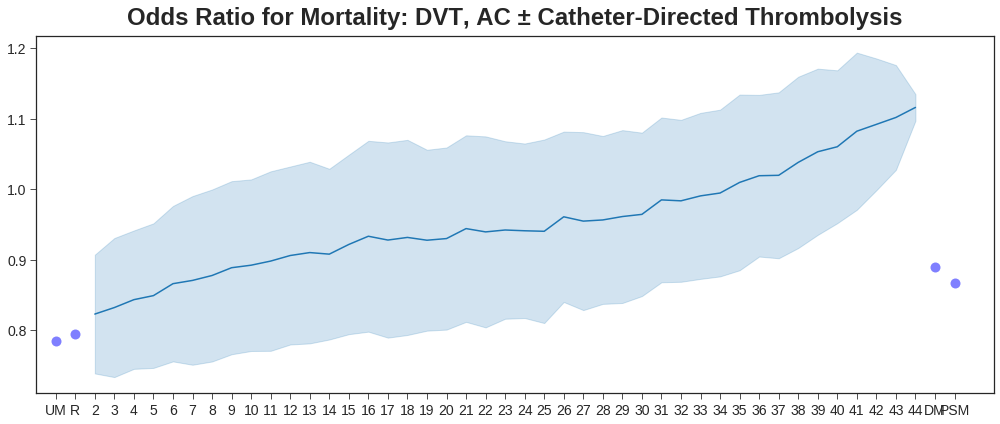

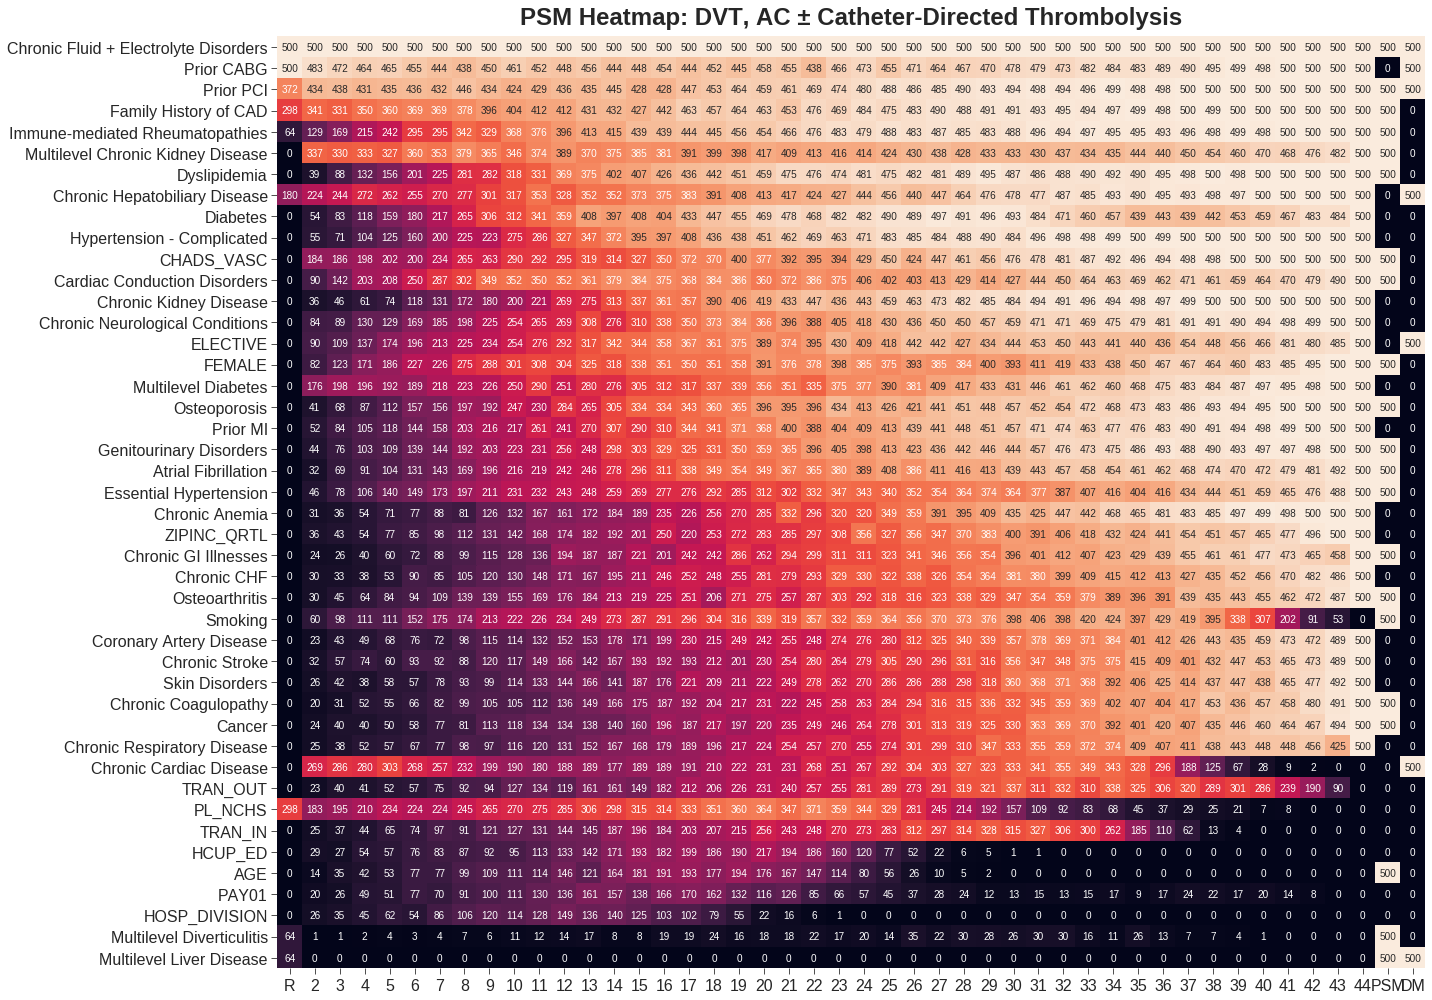

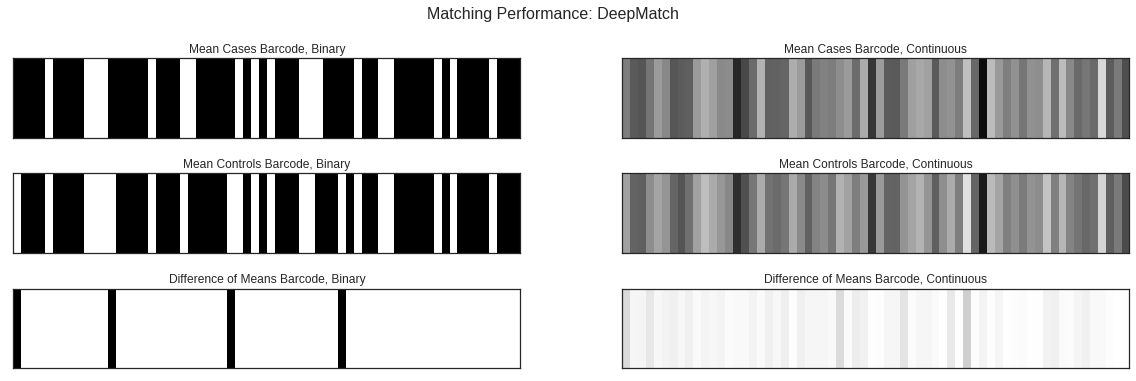

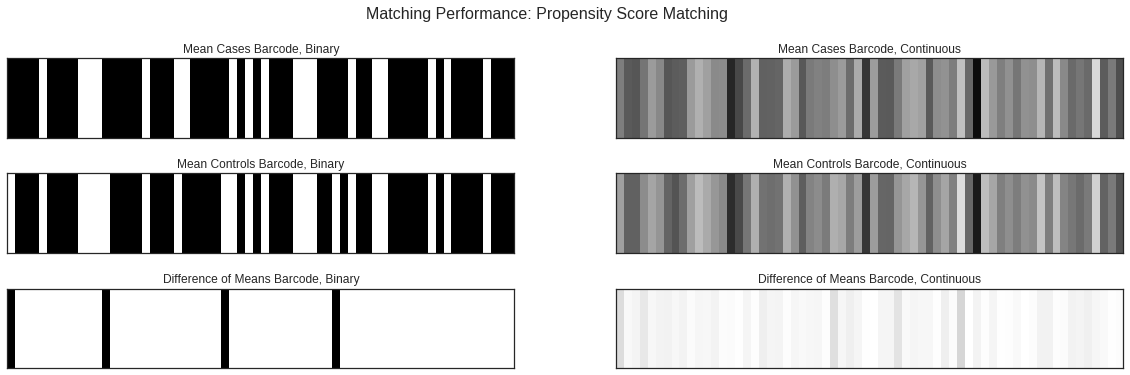

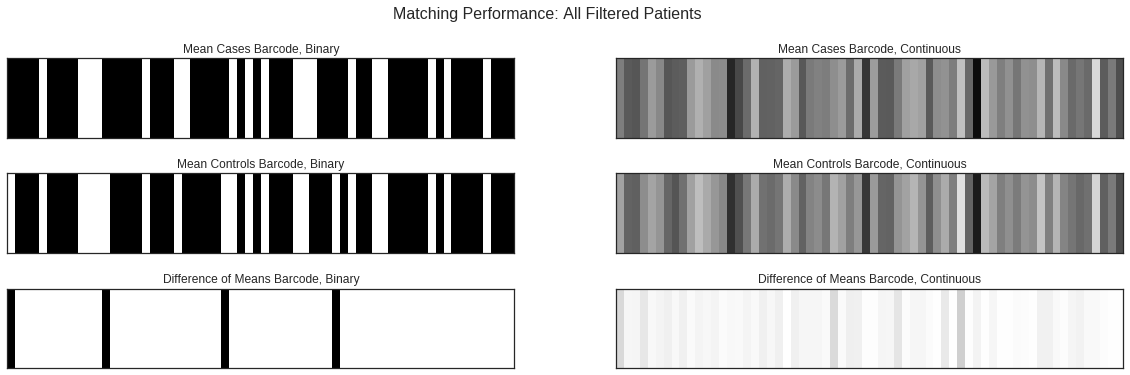

In [8]:
tables.file._open_files.close_all()
main('similarity/dvt_intervention_1.json', 'DVT, AC ± Catheter-Directed Thrombolysis : 1%', sample=0.01)

Closing remaining open files:/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...donestudy_type/dvt_intervention_10/NIS_2012_2014_proto_emb_v2_latentspace.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done


DX [45341, 45342, 45320]
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
PR [99100]
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
Embedding in latent space...
Building index trees...hold tight -_- eek.
Finding nearest neighbors...
Level 0 finished. Matched 337. Remaining 30.
Level 1 finished. Matched 22. Remaining 8.
Level 2 finished. Matched 8. Remaining 0.


  0%|          | 0/500 [11:19<?, ?it/s]

21500



  0%|          | 0/500 [1:05:35<?, ?it/s]
Closing remaining open files:/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...donestudy_type/dvt_intervention_10/NIS_2012_2014_proto_emb_v2_latentspace.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done
100%|██████████| 500/500 [00:49<00:00, 10.00it/s]


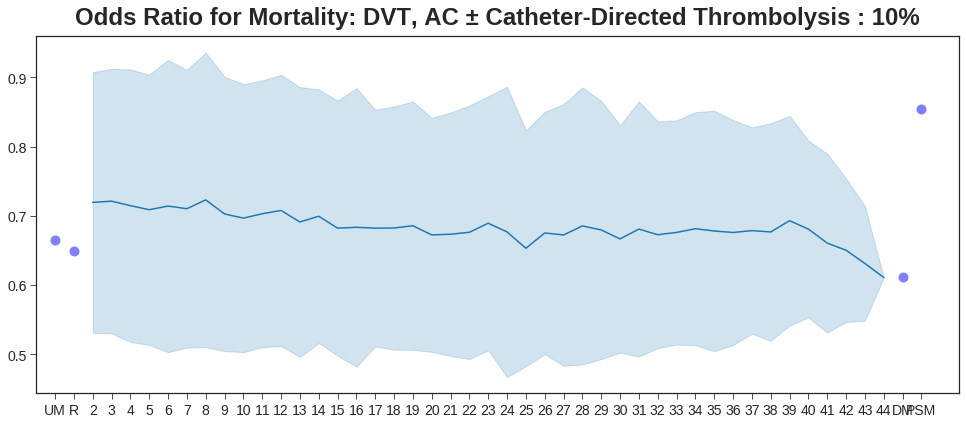

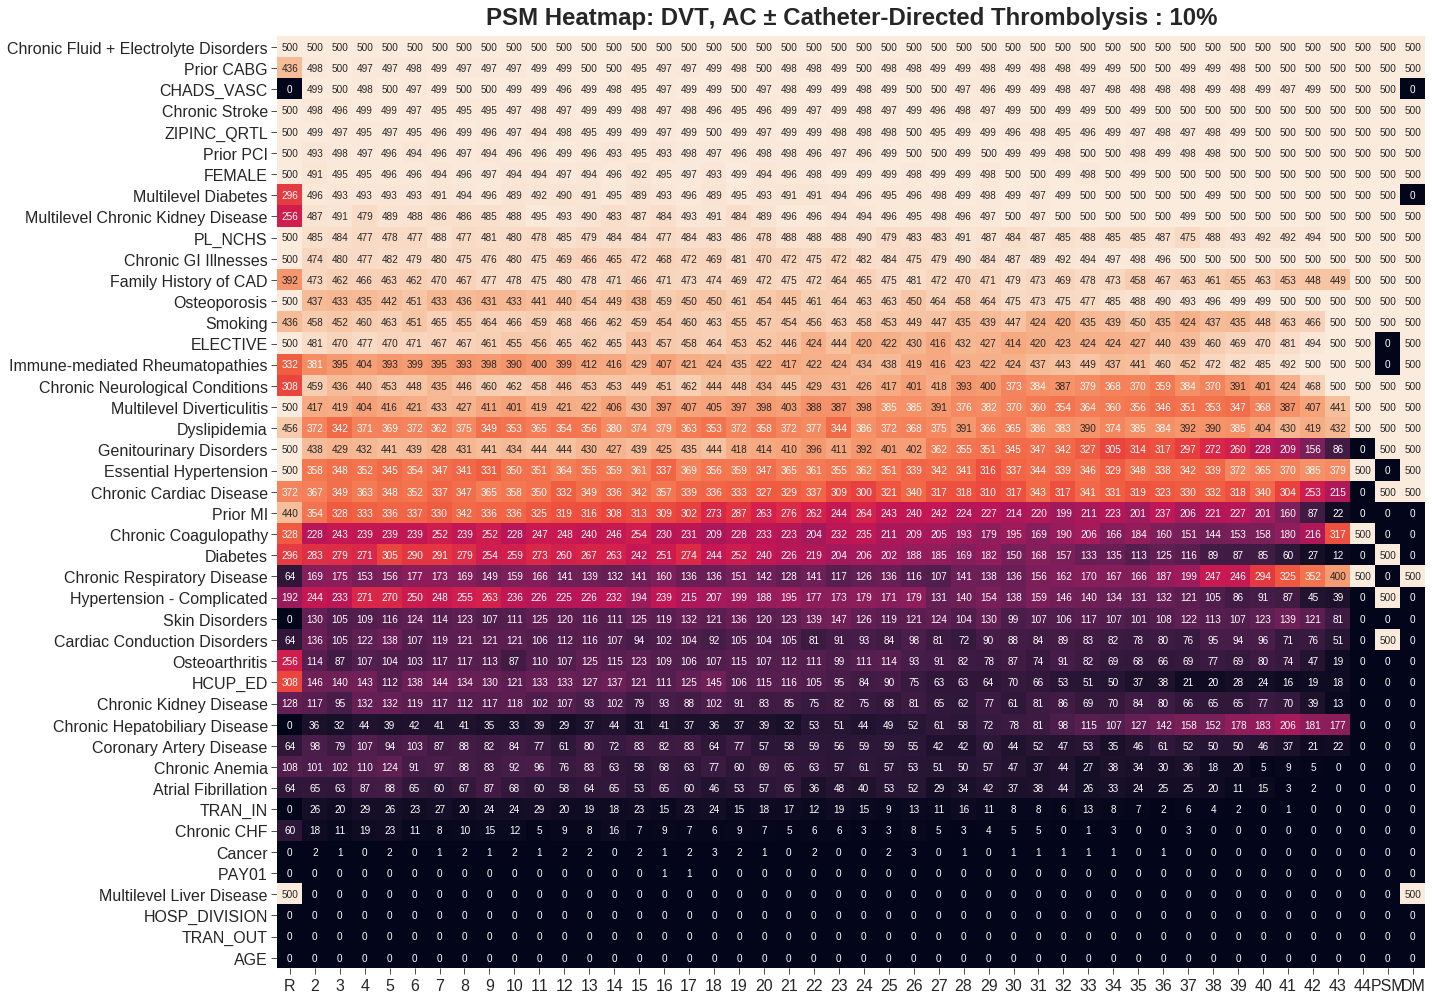

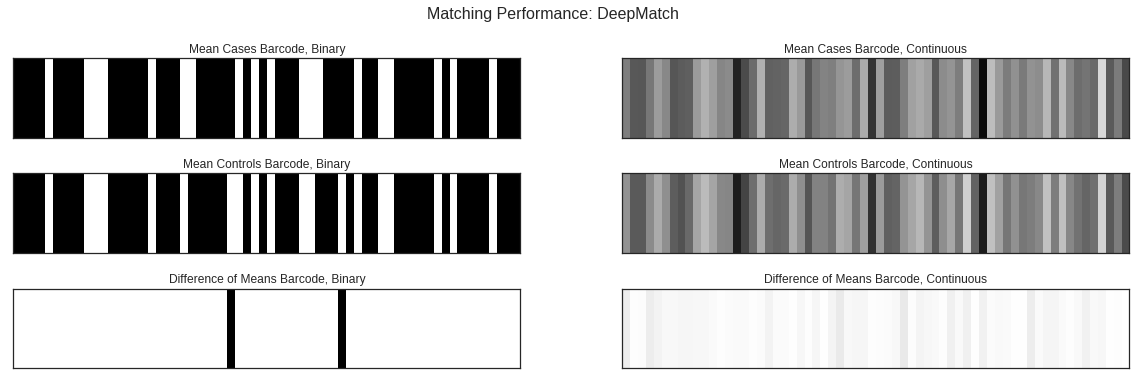

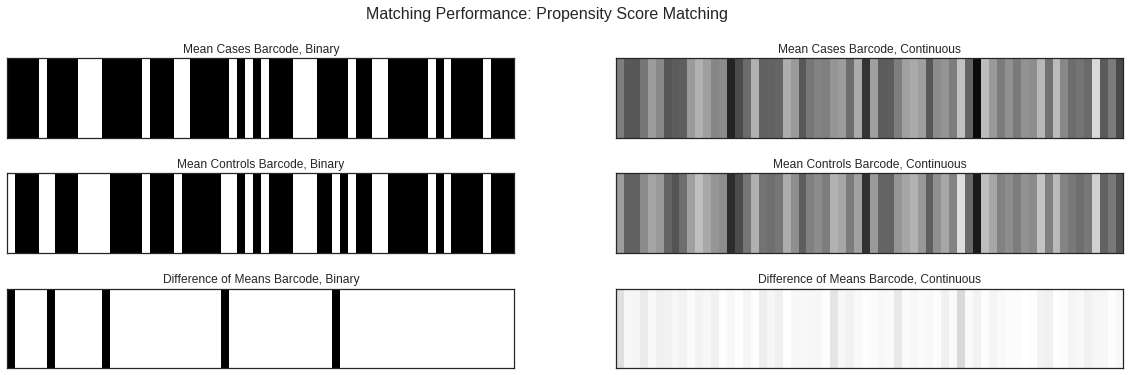

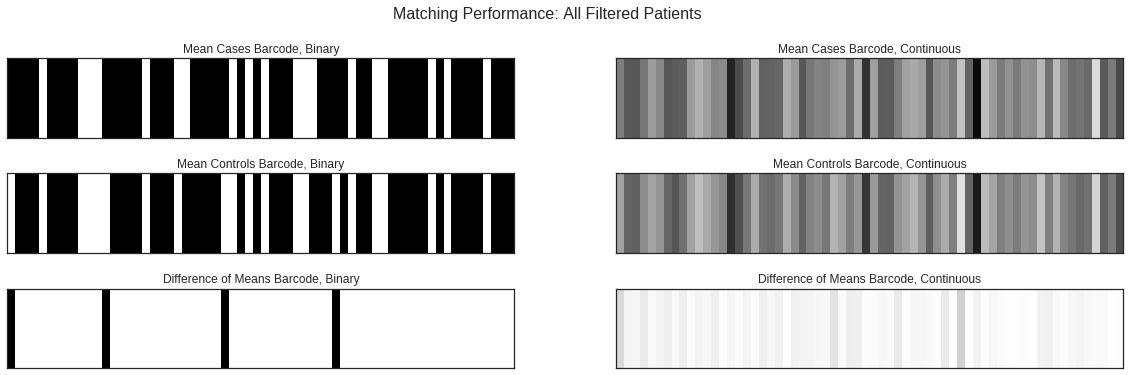

In [20]:
tables.file._open_files.close_all()
main('similarity/dvt_intervention_10.json', 'DVT, AC ± Catheter-Directed Thrombolysis : 10%', sample=0.1)

In [175]:
morts_c

[array([[[0.4, 1.9],
         [0.4, 1.9],
         [0.4, 1.9],
         ...,
         [0.4, 1.9],
         [0.3, 1.9],
         [0.4, 1.9]],
 
        [[0.4, 1.9],
         [0.5, 1.9],
         [0.3, 1.9],
         ...,
         [0.3, 1.9],
         [0.4, 1.9],
         [0.5, 1.9]],
 
        [[0.4, 1.9],
         [0.3, 1.9],
         [0.5, 1.9],
         ...,
         [0.3, 1.9],
         [0.5, 1.9],
         [0.5, 1.9]],
 
        ...,
 
        [[0.4, 1.9],
         [0.4, 1.9],
         [0.5, 1.9],
         ...,
         [0.4, 1.9],
         [0.5, 1.9],
         [0.4, 1.9]],
 
        [[0.4, 1.9],
         [0.4, 1.9],
         [0.5, 1.9],
         ...,
         [0.4, 1.9],
         [0.4, 1.9],
         [0.4, 1.9]],
 
        [[0.4, 1.9],
         [0.4, 1.9],
         [0.4, 1.9],
         ...,
         [0.4, 1.9],
         [0.4, 1.9],
         [0.4, 1.9]]]),
 6.129032258064516,
 3.725490196078431,
 5.410022779043182,
 3.725490196078431]

In [166]:
tables.file._open_files.close_all()
_, morts_c, _, _ = main('similarity/cas_cea.json', 'CAS vs CEA')
_, morts_s, _, _ = main('similarity/stroke_af.json', 'Stroke AF')

Closing remaining open files:study_type/dvt_intervention/NIS_2012_2014_proto_emb_v2_latentspace.h5...done


PR [38120, 610, 630]
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
PR [610, 630]
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
Embedding in latent space...
Building index trees...hold tight -_- eek.
Finding nearest neighbors...
Level 0 finished. Matched 7212. Remaining 4312.
Level 1 finished. Matched 1569. Remaining 2743.
Level 2 finished. Matched 738. Remaining 2005.
Level 3 finished. Matched 405. Remaining 1600.
Level 4 finished. Matched 287. Remaining 1313.
Level 5 finished. Matched 199. Remaining 1114.
Level 6 finished. Matched 141. Remaining 973.
Level 7 finished. Matched 102. Remaining 871.
Level 8 finished. Matched 94. Remaining 777.
Level 9 finished. Matched 65. Remaining 712.
Level 10 finished. Matched 57. Remaining 655.
Level 11 finished. Matched 39. Remaining 616.
Level 12 finis

Closing remaining open files:/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...donestudy_type/cas_cea/NIS_2012_2014_proto_emb_v2_latentspace.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done
100%|██████████| 500/500 [04:53<00:00,  1.71it/s] 


DXCCS [112, 109]
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
DX [42731]
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
Embedding in latent space...
Building index trees...hold tight -_- eek.
Finding nearest neighbors...
Level 0 finished. Matched 3012. Remaining 48.
Level 1 finished. Matched 46. Remaining 2.
Level 2 finished. Matched 2. Remaining 0.
Loaded PSM analysis from previous run.


Closing remaining open files:/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...donestudy_type/stroke_af/NIS_2012_2014_proto_emb_v2_latentspace.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5...done
100%|██████████| 500/500 [01:37<00:00,  5.11it/s] 


In [ ]:
tables.file._open_files.close_all()
main('similarity/cas_cea_1.json', 'CAS vs CEA : 1%', sample=0.01)

In [ ]:
tables.file._open_files.close_all()
main('similarity/stroke_af_10.json', 'Stroke ± AF : 10%', sample=0.1)

In [ ]:
tables.file._open_files.close_all()
main('similarity/stroke_af_1.json', 'Stroke ± AF : 1%', sample=0.01)

### Outcomes of Patients with Stroke and AFib

In [6]:
config_af = json.load(open('similarity/stroke_af.json', 'r'))
config_af = init(config_af)

In [29]:
ae = load_model(config_af)

In [25]:
tableones_af = {}

In [26]:
cb_af, tableones_af['filtered'], t1records_af = filter_for_study(config_af)

DXCCS [112, 109]
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
DX [42731]
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
case finished.
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  1
Retrieving data elements, chunk:  2
Retrieving data elements, chunk:  3
Retrieving data elements, chunk:  4
Retrieving data elements, chunk:  5
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  1
Retrieving comorbidities, chunk:  2
Retrieving comorbidities, chunk:  3
Retrieving comorbidities, chunk:  4
Retrieving comorbidities, chunk:  5
Retrieving severities, chunk:  0
Retrieving severities, chu

In [27]:
print(tableones_af['filtered'].tabulate(tablefmt='grid'))

+----------------------------------------------+---------+-------------------+--------------------+-----------+
|                                              |         | case              | control            | P-Value   |
+==============================================+=========+===================+====================+===========+
| n                                            |         | 3060              | 551526             |           |
+----------------------------------------------+---------+-------------------+--------------------+-----------+
| AGE, mean (SD)                               |         | 75.9 (11.4)       | 69.8 (14.7)        | <0.001    |
+----------------------------------------------+---------+-------------------+--------------------+-----------+
| CM_AIDS, n (%)                               | 0       | 3060 (100.0)      | 550648 (99.8)      | 0.019     |
+----------------------------------------------+---------+-------------------+--------------------+-----

In [30]:
tableones_af['dm'] = match_with_dm(cb_af, ae, config_af)

Embedding in latent space...
Building index trees...hold tight -_- eek.
Finding nearest neighbors...
Level 0 finished. Matched 3013. Remaining 47.
Level 1 finished. Matched 45. Remaining 2.
Level 2 finished. Matched 2. Remaining 0.
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
case finished.
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
control finished.
Finished constructing the table. Now performing stats...


In [31]:
print(tableones_af['dm'].tabulate(tablefmt='grid'))

+----------------------------------------------+---------+-------------------+-------------------+-----------+
|                                              |         | case              | control           | P-Value   |
+==============================================+=========+===================+===================+===========+
| n                                            |         | 3060              | 3060              |           |
+----------------------------------------------+---------+-------------------+-------------------+-----------+
| AGE, mean (SD)                               |         | 75.9 (11.4)       | 76.0 (11.5)       | 0.883     |
+----------------------------------------------+---------+-------------------+-------------------+-----------+
| CM_AIDS, n (%)                               | 0       | 3060 (100.0)      | 3060 (100.0)      | 1.000     |
+----------------------------------------------+---------+-------------------+-------------------+-----------+
|

In [297]:
t1records_af.to_csv(config_af['global']['PSM_RESULTS'] + 'FilteredDataForPSM.csv')

In [7]:
t1records_af = pd.read_csv(config_af['global']['PSM_RESULTS'] + 'FilteredDataForPSM.csv', index_col=0)

In [21]:
config_af['tableone']['ncpu'] = 40 # 40

In [12]:
config_af['psm']['PSM_END'] = 44 # 44

In [13]:
config_af['psm']['SEEDS'] = 500 # 500

In [16]:
psm_perf_final_af, morts_af = analyze_psm_matches(config_af, t1records_af)
morts_af = np.array(morts_af).reshape(config_af['psm']['PSM_END'] - 1, config_af['psm']['SEEDS'], 2).astype('float')

21500


100%|██████████| 21500/21500 [43:22<00:00,  8.26it/s]


In [17]:
np.save(config_af['global']['PSM_RESULTS'] + 'PSMResults_TTESTS.npy', psm_perf_final_af)

In [18]:
np.save(config_af['global']['PSM_RESULTS'] + 'PSMResults_MORTS.npy', morts_af.astype('float'))

In [265]:
random_perf_af, morts_rand_af = match_with_random_sampling(cb_af, t1records_af, config_af)

100%|██████████| 500/500 [01:34<00:00,  5.27it/s] 


In [266]:
mort_af_rand = 1 / np.divide(*np.mean(np.array(morts_rand_af).astype('float'), axis=0))

In [210]:
manual_name_af = [config_af['global']['PSM_RESULTS'] + 'FilteredDataForPSM.csv_rpsm_', '_manual.csv']
manual_perf_af, manual_mort_af = read_psm_file(manual_name_af, t1records_af)

In [212]:
# mort_af_dm = blah
mort_af_filt = 4.2 / 7.7
mort_af_dm = 4.2 / 4.0
mort_af_man = 4.2 / 8.4

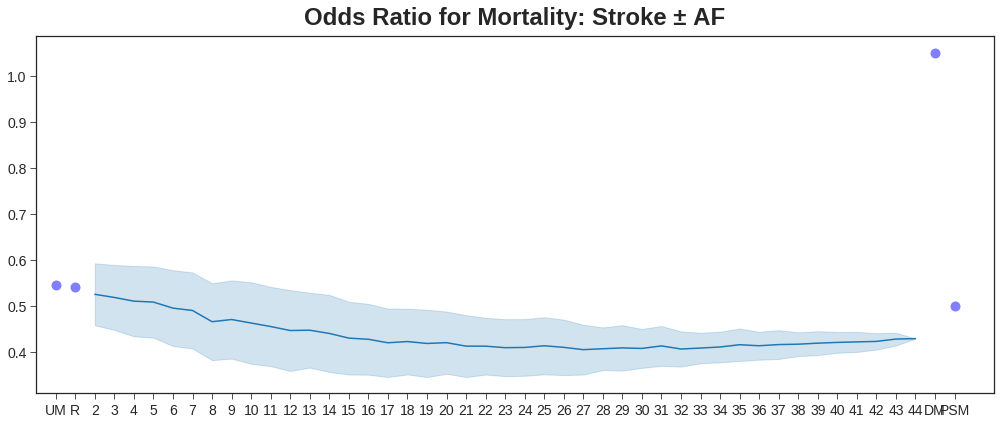

In [267]:
plot_mort(morts_af, config_af, mort_af_filt, mort_af_dm, mort_af_rand, mort_af_man, 'Stroke ± AF')

In [262]:
psm_perf_heatmap_af = psm_perf_final_af[:, :, :psm_perf_final_af.shape[0] + 1]

(43, 44)
(500, 44)


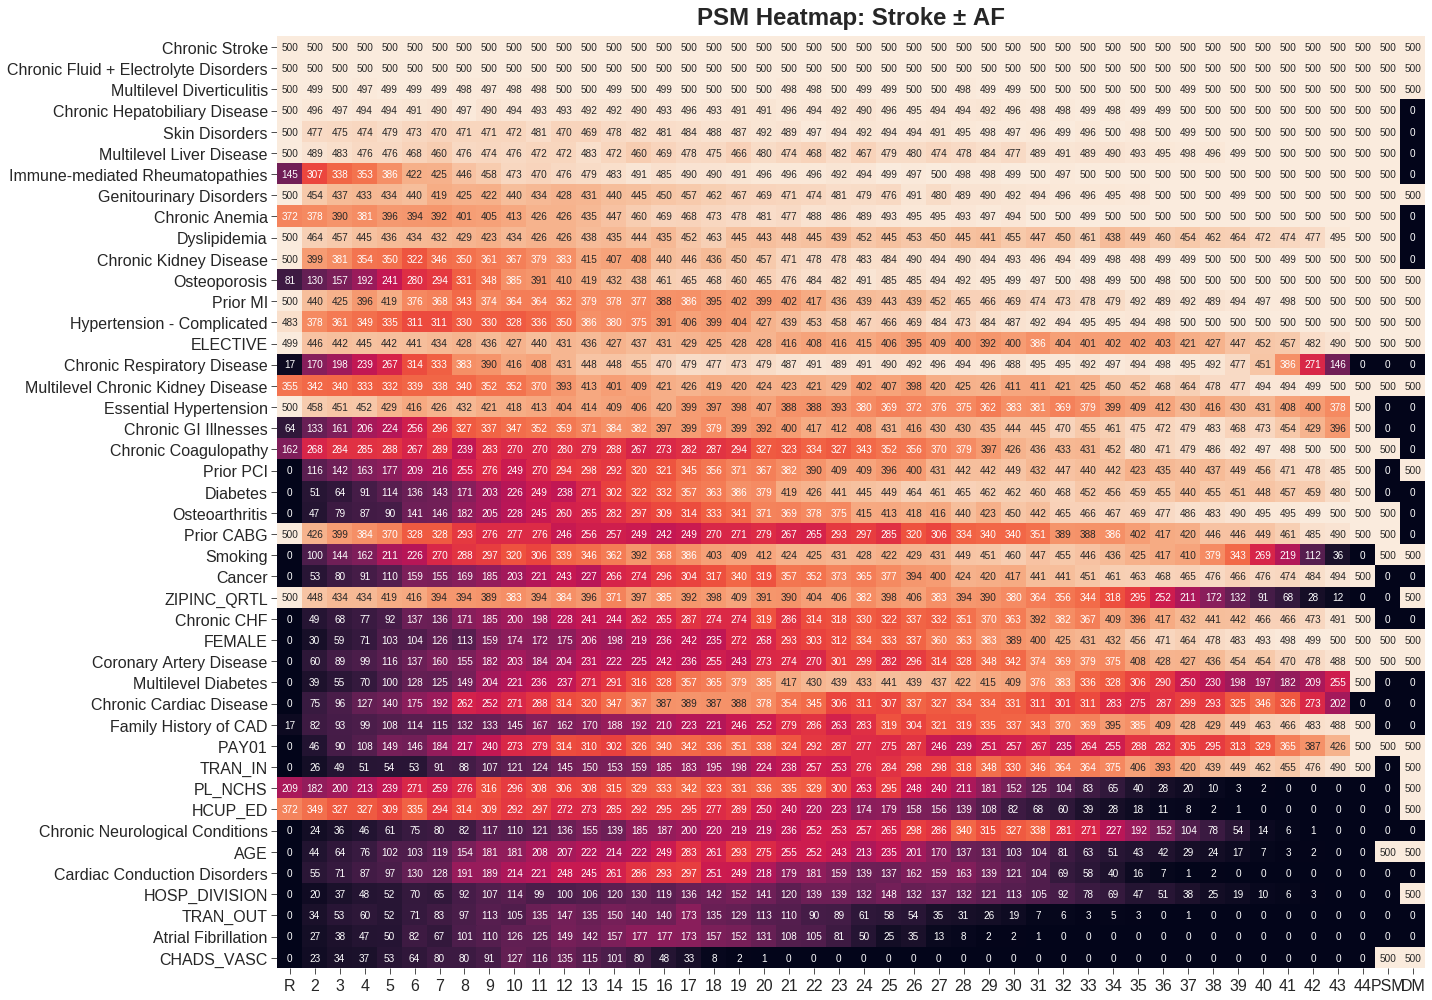

In [268]:
match_heatmap(psm_perf_heatmap_af, tableones_af['dm'], random_perf_af, manual_perf_af, config_af, 'Stroke ± AF')

### Effect of Catheter-Directed Thrombolysis + AC vs AC in Patients with DVT

In [181]:
config_dvt = json.load(open('similarity/dvt_intervention.json', 'r'))
config_dvt = init(config_dvt)

In [6]:
ae = load_model(config_dvt)

In [117]:
tableones_dvt = {}

In [183]:
cb_dvt, tableones_dvt['filtered'], t1records_dvt = filter_for_study(config_dvt)

DX [45341, 45342, 45320]
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
PR [99100]
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  1
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  1
Retrieving severities, chunk:  0
Retrieving severities, chunk:  1
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  1


In [184]:
print(tableones_dvt['filtered'].tabulate(tablefmt='grid'))

+----------------------------------------------+---------+--------------------+--------------------+-----------+
|                                              |         | case               | control            | P-Value   |
+==============================================+=========+====================+====================+===========+
| n                                            |         | 3678               | 145260             |           |
+----------------------------------------------+---------+--------------------+--------------------+-----------+
| AGE, mean (SD)                               |         | 57.0 (16.6)        | 65.8 (16.6)        | <0.001    |
+----------------------------------------------+---------+--------------------+--------------------+-----------+
| CM_AIDS, n (%)                               | 0       | 3659 (99.5)        | 144948 (99.8)      | <0.001    |
+----------------------------------------------+---------+--------------------+-----------------

In [185]:
tableones_dvt['dm'] = match_with_dm(cb_dvt, ae, config_dvt)

Embedding in latent space...
Building index trees...hold tight -_- eek.
Finding nearest neighbors...
Level 0 finished. Matched 3112. Remaining 566.
Level 1 finished. Matched 342. Remaining 224.
Level 2 finished. Matched 97. Remaining 127.
Level 3 finished. Matched 52. Remaining 75.
Level 4 finished. Matched 35. Remaining 40.
Level 5 finished. Matched 17. Remaining 23.
Level 6 finished. Matched 10. Remaining 13.
Level 7 finished. Matched 3. Remaining 10.
Level 8 finished. Matched 3. Remaining 7.
Level 9 finished. Matched 1. Remaining 6.
Level 10 finished. Matched 1. Remaining 5.
Level 11 finished. Matched 0. Remaining 5.
Level 12 finished. Matched 0. Remaining 5.
Level 13 finished. Matched 1. Remaining 4.
Level 14 finished. Matched 2. Remaining 2.
Level 15 finished. Matched 0. Remaining 2.
Level 16 finished. Matched 1. Remaining 1.
Level 17 finished. Matched 0. Remaining 1.
Level 18 finished. Matched 0. Remaining 1.
Level 19 finished. Matched 1. Remaining 0.
Retrieving data elements, ch

In [186]:
print(tableones_dvt['dm'].tabulate(tablefmt='grid'))

+----------------------------------------------+---------+--------------------+--------------------+-----------+
|                                              |         | case               | control            | P-Value   |
+==============================================+=========+====================+====================+===========+
| n                                            |         | 3678               | 3678               |           |
+----------------------------------------------+---------+--------------------+--------------------+-----------+
| AGE, mean (SD)                               |         | 57.0 (16.6)        | 65.5 (16.6)        | <0.001    |
+----------------------------------------------+---------+--------------------+--------------------+-----------+
| CM_AIDS, n (%)                               | 0       | 3659 (99.5)        | 3667 (99.7)        | 0.200     |
+----------------------------------------------+---------+--------------------+-----------------

In [188]:
t1records_dvt.to_csv(config_dvt['global']['PSM_RESULTS'] + 'FilteredDataForPSM.csv')

In [31]:
t1records_dvt = pd.read_csv(config_dvt['global']['PSM_RESULTS'] + 'FilteredDataForPSM.csv', index_col=0)

In [225]:
config_dvt['tableone']['ncpu'] = 40

In [228]:
psm_perf_final_dvt, morts_dvt = analyze_psm_matches(config_dvt, t1records_dvt)
morts_dvt = np.array(morts_dvt).reshape(config_dvt['psm']['PSM_END'] - 1, config_dvt['psm']['SEEDS'], 2).astype('float')

21500


100%|██████████| 21500/21500 [45:59<00:00,  7.79it/s]  


In [229]:
np.save(config_dvt['global']['PSM_RESULTS'] + 'PSMResults_TTESTS.npy', psm_perf_final_dvt)
np.save(config_dvt['global']['PSM_RESULTS'] + 'PSMResults_MORTS.npy', morts_dvt)

In [230]:
manual_name_dvt = [config_dvt['global']['PSM_RESULTS'] + 'FilteredDataForPSM.csv_rpsm_', '_manual.csv']
manual_perf_dvt, manual_mort_dvt = read_psm_file(manual_name_dvt, t1records_dvt)

In [202]:
# mort_dvt_dm = blah
mort_dvt_filt = 3.3 / 4.2
mort_dvt_dm = 3.3 / 3.7
mort_dvt_man = 3.3 / 3.8

In [269]:
random_perf_dvt, morts_rand_dvt = match_with_random_sampling(cb_dvt, t1records_dvt, config_dvt)
mort_dvt_rand = 1 / np.divide(*np.mean(np.array(morts_rand_dvt).astype('float'), axis=0))

100%|██████████| 500/500 [02:10<00:00,  3.82it/s]


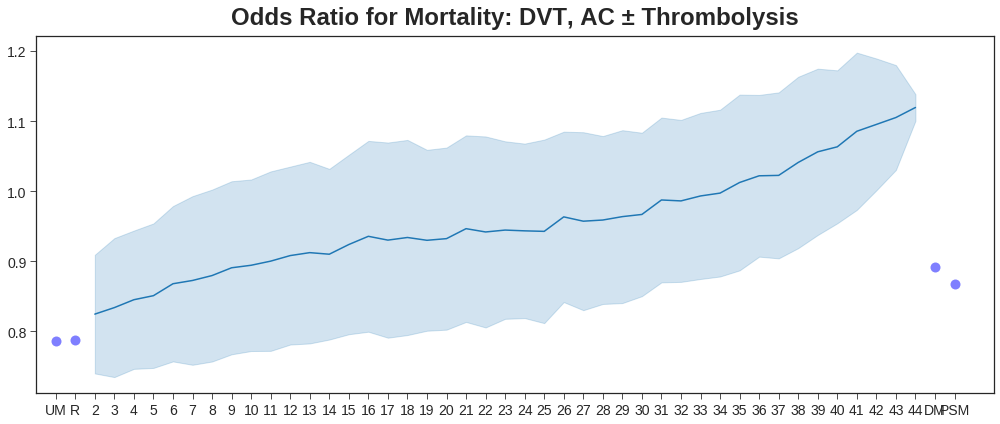

In [270]:
plot_mort(morts_dvt, config_dvt, mort_dvt_filt, mort_dvt_dm, mort_dvt_rand, mort_dvt_man, 'DVT, AC ± Thrombolysis')

In [130]:
psm_perf_final_dvt = np.load(config_dvt['global']['PSM_RESULTS'] + 'PSMResults_TTESTS.npy')

In [235]:
psm_perf_heatmap_dvt = psm_perf_final_dvt[:, :, :psm_perf_final_dvt.shape[0] + 1]

(43, 44)
(500, 44)


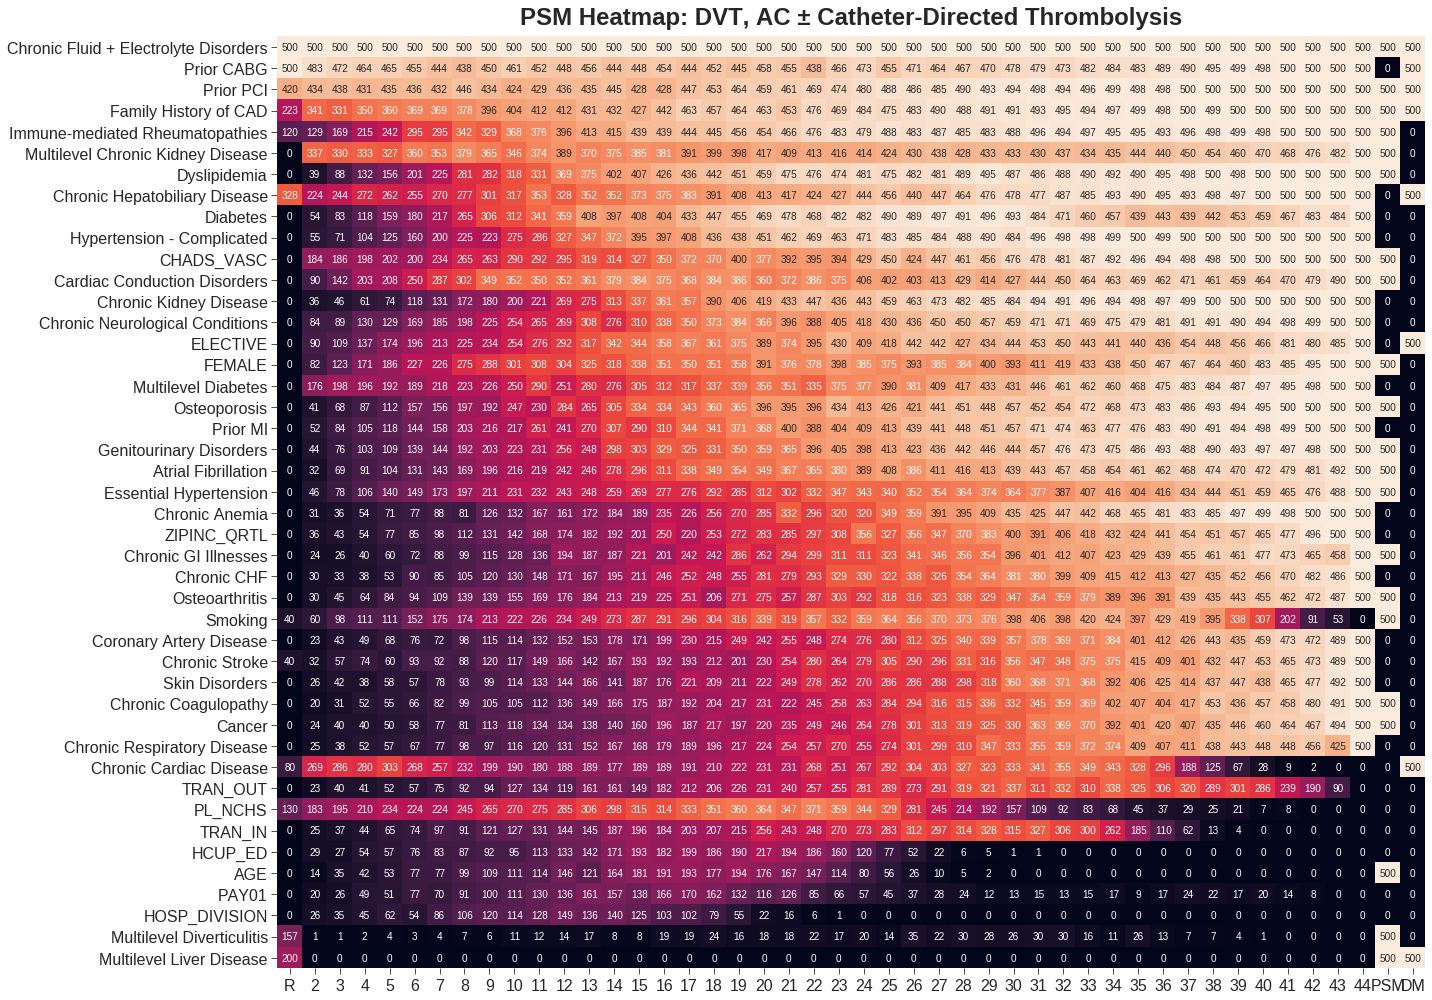

In [271]:
match_heatmap(psm_perf_heatmap_dvt, tableones_dvt['dm'], random_perf_dvt, manual_perf_dvt, config_dvt, 'DVT, AC ± Catheter-Directed Thrombolysis')

### Effect of Catheter-Directed Thrombolysis + AC vs AC in Patients with DVT - 10% Sample

In [375]:
config_dvt_10 = json.load(open('similarity/dvt_intervention_10.json', 'r'))
config_dvt_10 = init(config_dvt_10)

In [ ]:
ae = load_model(config_dvt_10)

In [377]:
tableones_dvt_10 = {}

In [393]:
cb_dvt_10, tableones_dvt_10['filtered'], t1records_dvt_10 = filter_for_study(config_dvt_10, sample=0.1)

DX [45341, 45342, 45320]
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
PR [99100]
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0


In [394]:
print(tableones_dvt_10['filtered'].tabulate(tablefmt='grid'))

+----------------------------------------------+---------+--------------------+--------------------+-----------+
|                                              |         | case               | control            | P-Value   |
+==============================================+=========+====================+====================+===========+
| n                                            |         | 367                | 14526              |           |
+----------------------------------------------+---------+--------------------+--------------------+-----------+
| AGE, mean (SD)                               |         | 57.5 (16.6)        | 65.7 (16.6)        | <0.001    |
+----------------------------------------------+---------+--------------------+--------------------+-----------+
| CM_AIDS, n (%)                               | 0       | 366 (99.7)         | 14498 (99.8)       | 0.515     |
+----------------------------------------------+---------+--------------------+-----------------

In [400]:
tableones_dvt_10['dm'] = match_with_dm(cb_dvt_10, ae, config_dvt_10)

Embedding in latent space...
Building index trees...hold tight -_- eek.
Finding nearest neighbors...
Level 0 finished. Matched 337. Remaining 30.
Level 1 finished. Matched 22. Remaining 8.
Level 2 finished. Matched 8. Remaining 0.
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0


In [401]:
print(tableones_dvt_10['dm'].tabulate(tablefmt='grid'))

+----------------------------------------------+---------+--------------------+-------------------+-----------+
|                                              |         | case               | control           | P-Value   |
+==============================================+=========+====================+===================+===========+
| n                                            |         | 367                | 367               |           |
+----------------------------------------------+---------+--------------------+-------------------+-----------+
| AGE, mean (SD)                               |         | 57.5 (16.6)        | 59.0 (15.5)       | 0.214     |
+----------------------------------------------+---------+--------------------+-------------------+-----------+
| CM_AIDS, n (%)                               | 0       | 366 (99.7)         | 367 (100.0)       | 1.000     |
+----------------------------------------------+---------+--------------------+-------------------+-----

In [402]:
t1records_dvt_10.to_csv(config_dvt_10['global']['PSM_RESULTS'] + 'FilteredDataForPSM.csv')

In [31]:
t1records_dvt_10 = pd.read_csv(config_dvt_10['global']['PSM_RESULTS'] + 'FilteredDataForPSM.csv', index_col=0)

In [225]:
config_dvt_10['tableone']['ncpu'] = 40

In [228]:
psm_perf_final_dvt_10, morts_dvt_10 = analyze_psm_matches(config_dvt_10, t1records_dvt_10)
morts_dvt_10 = np.array(morts_dvt_10).reshape(config_dvt_10['psm']['PSM_END'] - 1, config_dvt_10['psm']['SEEDS'], 2).astype('float')

21500


100%|██████████| 21500/21500 [45:59<00:00,  7.79it/s]  


In [229]:
np.save(config_dvt_10['global']['PSM_RESULTS'] + 'PSMResults_TTESTS.npy', psm_perf_final_dvt_10)
np.save(config_dvt_10['global']['PSM_RESULTS'] + 'PSMResults_MORTS.npy', morts_dvt_10)

In [230]:
manual_name_dvt_10 = [config_dvt_10['global']['PSM_RESULTS'] + 'FilteredDataForPSM.csv_rpsm_', '_manual.csv']
manual_perf_dvt_10, manual_mort_dvt_10 = read_psm_file(manual_name_dvt_10, t1records_dvt_10)

In [202]:
# mort_dvt_10_dm = blah
mort_dvt_10_filt = 3.3 / 4.2
mort_dvt_10_dm = 3.3 / 2.2
mort_dvt_10_man = 3.3 / 3.8

In [269]:
random_perf_dvt_10, morts_rand_dvt_10 = match_with_random_sampling(cb_dvt_10, t1records_dvt_10, config_dvt_10)
mort_dvt_10_rand = 1 / np.divide(*np.mean(np.array(morts_rand_dvt_10).astype('float'), axis=0))

100%|██████████| 500/500 [02:10<00:00,  3.82it/s]


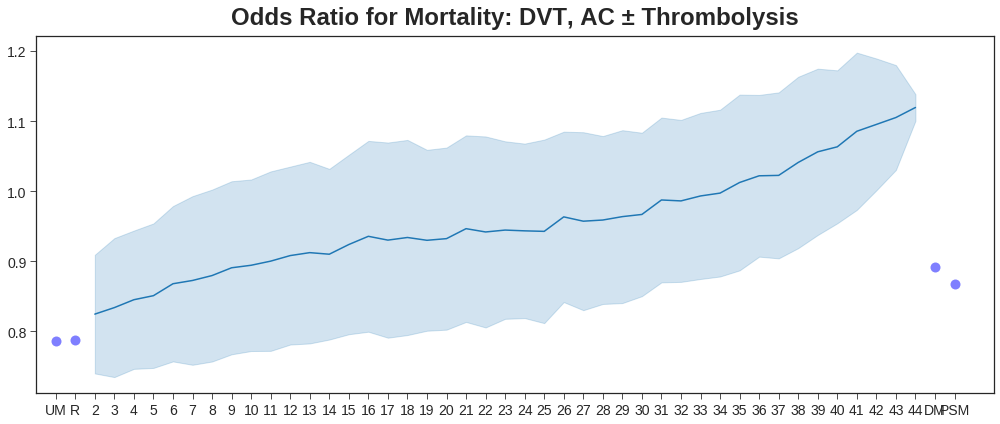

In [270]:
plot_mort(morts_dvt_10, config_dvt_10, mort_dvt_10_filt, mort_dvt_10_dm, mort_dvt_10_rand, mort_dvt_10_man, 'DVT, AC ± Thrombolysis')

In [130]:
psm_perf_final_dvt_10 = np.load(config_dvt_10['global']['PSM_RESULTS'] + 'PSMResults_TTESTS.npy')

In [235]:
psm_perf_heatmap_dvt_10 = psm_perf_final_dvt_10[:, :, :psm_perf_final_dvt_10.shape[0] + 1]

(43, 44)
(500, 44)


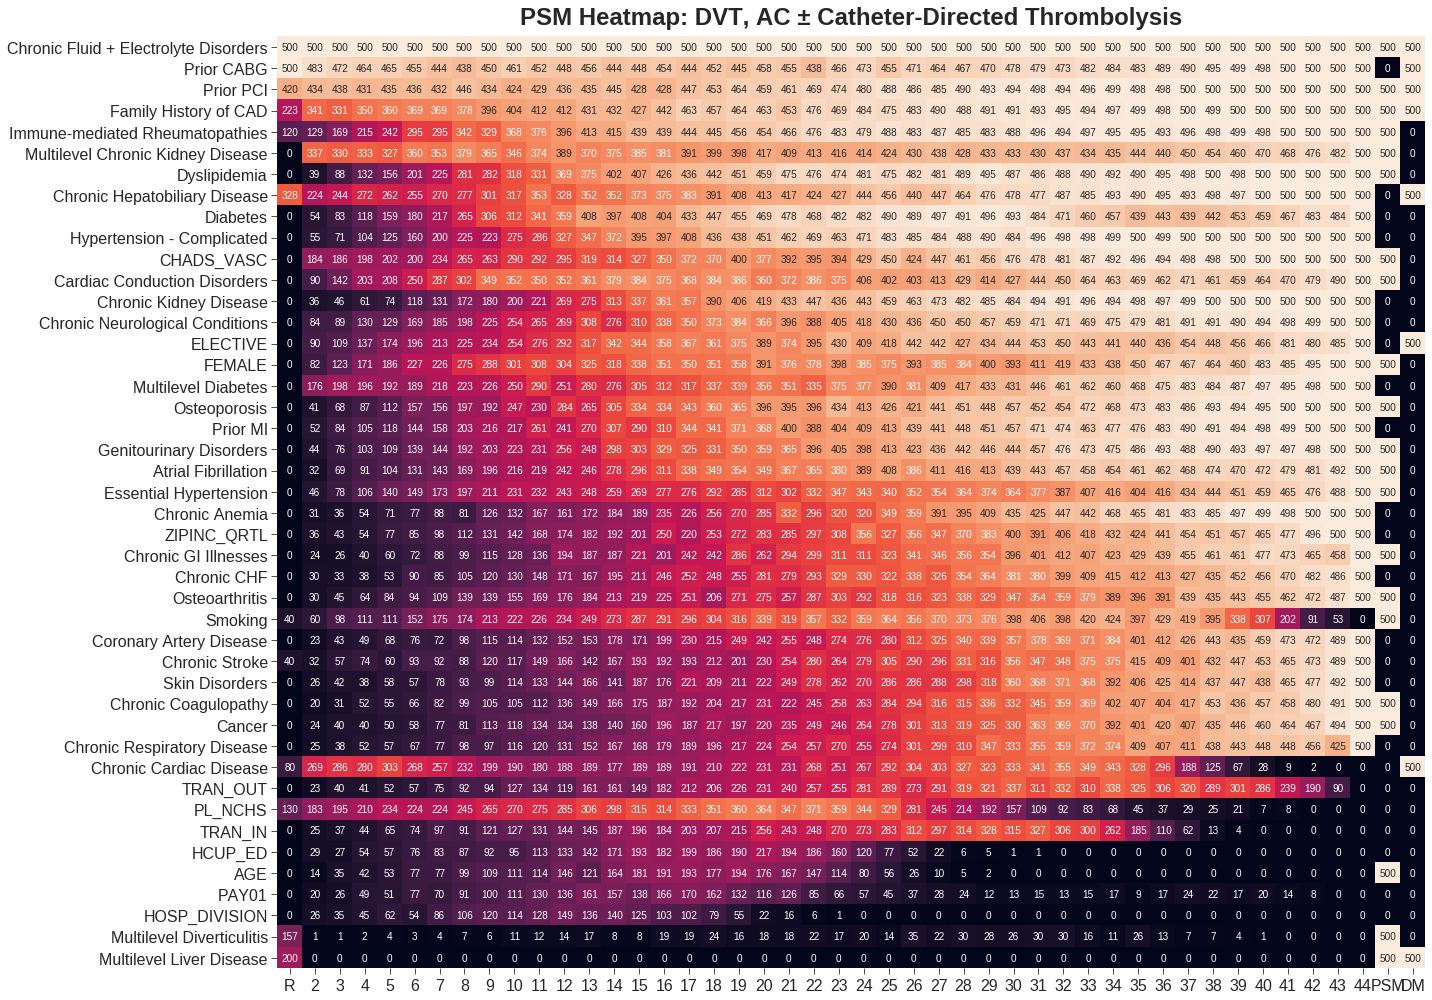

In [271]:
match_heatmap(psm_perf_heatmap_dvt_10, tableones_dvt_10['dm'], random_perf_dvt_10, manual_perf_dvt_10, config_dvt_10, 'DVT, AC ± Catheter-Directed Thrombolysis')

### Differences in TAVR vs SAVR for Patietns With Bicuspid Aortic Valves

In [87]:
config_ts

{'global': {'DEVICE': 'cuda:0',
  'PROJECT_DIR': '/home/aisinai/work/repos/nis_patient_encoding/',
  'DATA_FOLDER': 'data/raw/',
  'PSM_RESULTS': 'study_type/pci_cancer/psm_result/',
  'STUDY': 'study_type/pci_cancer/'},
 'psm': {'SEEDS': 500, 'PSM_START': 2, 'PSM_END': 44, 'FEATURES': 44},
 'data': {'full': '/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5',
  'model': '/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_2012_2014_proto_emb_v2.h5',
  'filtering': '/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_Pruned.h5',
  'matching': '/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_2012_2014_proto_emb_v2.h5',
  'eval_input': '/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_2012_2014_proto_emb_v2.h5',
  'eval_output': '/home/aisinai/work/repos/nis_patient_encoding/data/raw/NIS_2012_2014_proto_emb_v2.h5'},
 'tableone': {'ncpu': 64,
  'desired_cols': ['AGE',
   'CM_AIDS',
   'CM_ALCOHOL',
   'CM_ANEMDEF',
   'CM_ARTH',
   'CM

In [50]:
config_ts = json.load(open('similarity/savr_tavr.json', 'r'))
config_ts = init(config_ts)

In [25]:
ae = load_model(config_ts)

In [51]:
tableones_ts = {}

In [ ]:
### cb_ts2, filtt, t1r_ts2 = filter_for_study(config_ts)

In [52]:
cb_ts, tableones_ts['filtered'], t1records_ts = filter_for_study(config_ts)

PR [35210, 35220, 35050, 35060]
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
PR [35050, 35060]
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0


In [53]:
print(tableones_ts['filtered'].tabulate(tablefmt='grid'))

+----------------------------------------------+---------+---------------------+---------------------+-----------+
|                                              |         | case                | control             | P-Value   |
+==============================================+=========+=====================+=====================+===========+
| n                                            |         | 6106                | 32006               |           |
+----------------------------------------------+---------+---------------------+---------------------+-----------+
| AGE, mean (SD)                               |         | 81.2 (8.3)          | 68.2 (12.9)         | <0.001    |
+----------------------------------------------+---------+---------------------+---------------------+-----------+
| CM_AIDS, n (%)                               | 0       | 6106 (100.0)        | 31987 (99.9)        | 0.059     |
+----------------------------------------------+---------+---------------------+

In [54]:
tableones_ts['dm'] = match_with_dm(cb_ts, ae, config_ts)

Embedding in latent space...
Building index trees...hold tight -_- eek.
Finding nearest neighbors...
Level 0 finished. Matched 3644. Remaining 2462.
Level 1 finished. Matched 831. Remaining 1631.
Level 2 finished. Matched 424. Remaining 1207.
Level 3 finished. Matched 268. Remaining 939.
Level 4 finished. Matched 183. Remaining 756.
Level 5 finished. Matched 127. Remaining 629.
Level 6 finished. Matched 92. Remaining 537.
Level 7 finished. Matched 77. Remaining 460.
Level 8 finished. Matched 50. Remaining 410.
Level 9 finished. Matched 54. Remaining 356.
Level 10 finished. Matched 44. Remaining 312.
Level 11 finished. Matched 33. Remaining 279.
Level 12 finished. Matched 28. Remaining 251.
Level 13 finished. Matched 28. Remaining 223.
Level 14 finished. Matched 22. Remaining 201.
Level 15 finished. Matched 19. Remaining 182.
Level 16 finished. Matched 17. Remaining 165.
Level 17 finished. Matched 14. Remaining 151.
Level 18 finished. Matched 14. Remaining 137.
Level 19 finished. Matche

In [55]:
print(tableones_ts['dm'].tabulate(tablefmt='grid'))

+----------------------------------------------+---------+---------------------+---------------------+-----------+
|                                              |         | case                | control             | P-Value   |
+==============================================+=========+=====================+=====================+===========+
| n                                            |         | 6061                | 6061                |           |
+----------------------------------------------+---------+---------------------+---------------------+-----------+
| AGE, mean (SD)                               |         | 81.2 (8.3)          | 73.8 (11.7)         | <0.001    |
+----------------------------------------------+---------+---------------------+---------------------+-----------+
| CM_AIDS, n (%)                               | 0       | 6061 (100.0)        | 6059 (100.0)        | 0.500     |
+----------------------------------------------+---------+---------------------+

In [349]:
t1records_ts.to_csv(config_ts['global']['PSM_RESULTS'] + 'FilteredDataForPSM.csv')

In [7]:
t1records_ts = pd.read_csv(config_ts['global']['PSM_RESULTS'] + 'FilteredDataForPSM.csv', index_col=0)

In [21]:
config_ts['tableone']['ncpu'] = 40 # 40

In [12]:
config_ts['psm']['PSM_END'] = 44 # 44

In [13]:
config_ts['psm']['SEEDS'] = 500 # 500

In [56]:
psm_perf_final_ts, morts_ts = analyze_psm_matches(config_ts, t1records_ts)
morts_ts = np.array(morts_ts).reshape(config_ts['psm']['PSM_END'] - 1, config_ts['psm']['SEEDS'], 2).astype('float')

  0%|          | 0/500 [12:31:47<?, ?it/s]

21500



  0%|          | 0/500 [13:33:40<?, ?it/s]


In [57]:
np.save(config_ts['global']['PSM_RESULTS'] + 'PSMResults_TTESTS.npy', psm_perf_final_ts)

In [58]:
np.save(config_ts['global']['PSM_RESULTS'] + 'PSMResults_MORTS.npy', morts_ts.astype('float'))

In [272]:
random_perf_ts, morts_rand_ts = match_with_random_sampling(cb_ts, t1records_ts, config_ts)
mort_ts_rand = 1 / np.divide(*np.mean(np.array(morts_rand_ts).astype('float'), axis=0))

100%|██████████| 500/500 [02:40<00:00,  3.12it/s]


In [157]:
manual_name_ts = [config_ts['global']['PSM_RESULTS'] + 'FilteredDataForPSM.csv_rpsm_', '_manual.csv']
manual_perf_ts, manual_mort_ts = read_psm_file(manual_name_ts, t1records_ts)

In [203]:
# mort_ts_dm = blah
mort_ts_filt = 4.2 / 3.3
mort_ts_dm =  4.2 / 3.3
mort_ts_manual = 4.2 / 5.6

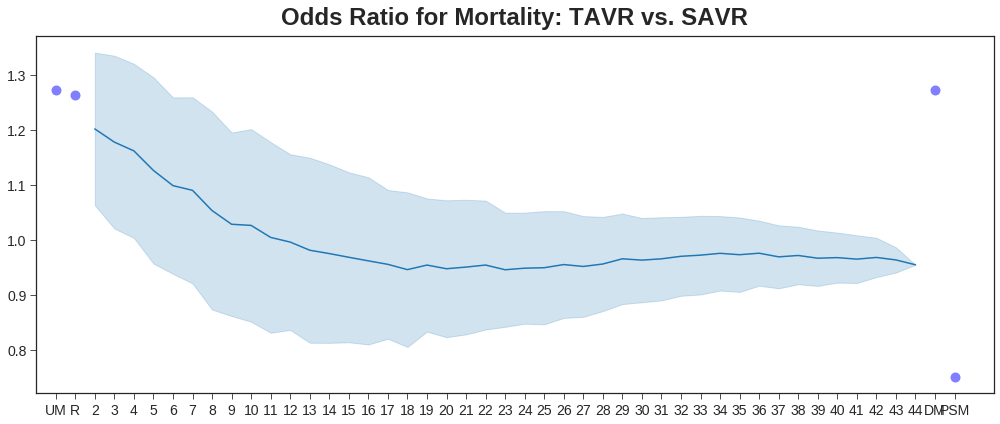

In [273]:
plot_mort(morts_ts, config_ts, mort_ts_filt, mort_ts_dm, mort_ts_rand, mort_ts_manual, 'TAVR vs. SAVR')

In [62]:
psm_perf_heatmap_ts = psm_perf_final_ts[:, :, :psm_perf_final_ts.shape[0] + 1]

(43, 44)
(500, 44)


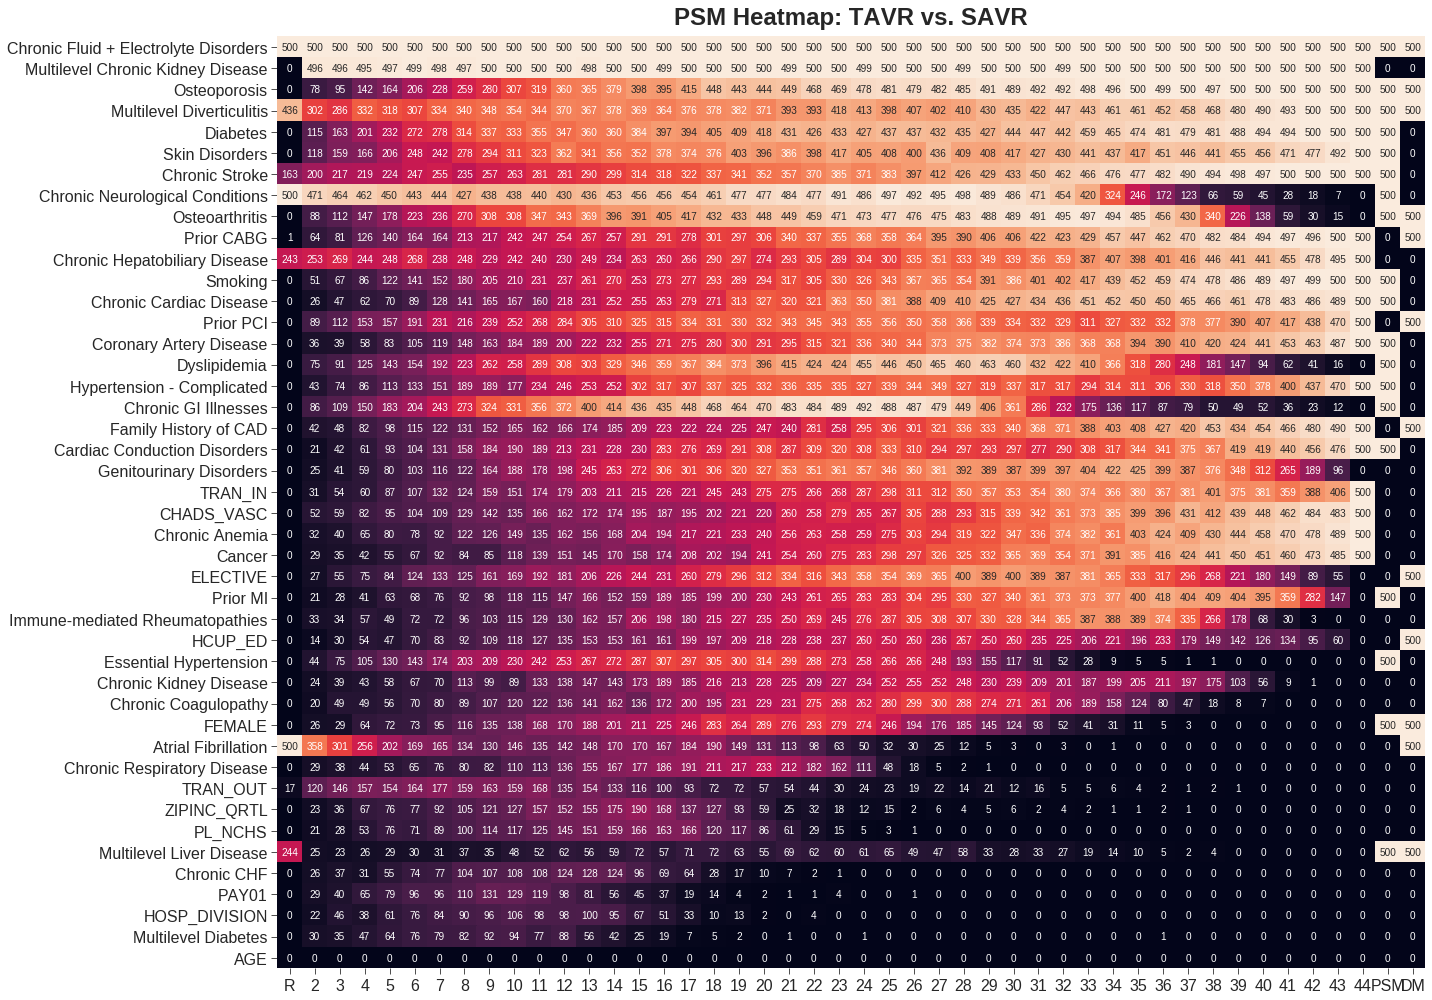

In [274]:
match_heatmap(psm_perf_heatmap_ts, tableones_ts['dm'],  random_perf_ts, manual_perf_ts, config_ts, 'TAVR vs. SAVR')

### Differences in Carotid Artery Stenting vs Carotid Endarterectomy

In [275]:
config_cc = json.load(open('similarity/cas_cea.json', 'r'))
config_cc = init(config_cc)

In [25]:
ae = load_model(config_cc)

In [276]:
tableones_cc = {}

In [278]:
cb_cc, tableones_cc['filtered'], t1records_cc = filter_for_study(config_cc)

PR [38120, 610, 630]
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
PR [610, 630]
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0


In [279]:
print(tableones_cc['filtered'].tabulate(tablefmt='grid'))

+----------------------------------------------+---------+--------------------+-------------------+-----------+
|                                              |         | case               | control           | P-Value   |
+==============================================+=========+====================+===================+===========+
| n                                            |         | 11524              | 39604             |           |
+----------------------------------------------+---------+--------------------+-------------------+-----------+
| AGE, mean (SD)                               |         | 67.2 (13.0)        | 71.0 (9.4)        | <0.001    |
+----------------------------------------------+---------+--------------------+-------------------+-----------+
| CM_AIDS, n (%)                               | 0       | 11509 (99.9)       | 39588 (100.0)     | 0.001     |
+----------------------------------------------+---------+--------------------+-------------------+-----

In [282]:
tableones_cc['dm'] = match_with_dm(cb_cc, ae, config_cc)

Embedding in latent space...
Building index trees...hold tight -_- eek.
Finding nearest neighbors...
Level 0 finished. Matched 7212. Remaining 4312.
Level 1 finished. Matched 1569. Remaining 2743.
Level 2 finished. Matched 738. Remaining 2005.
Level 3 finished. Matched 405. Remaining 1600.
Level 4 finished. Matched 287. Remaining 1313.
Level 5 finished. Matched 199. Remaining 1114.
Level 6 finished. Matched 141. Remaining 973.
Level 7 finished. Matched 102. Remaining 871.
Level 8 finished. Matched 94. Remaining 777.
Level 9 finished. Matched 65. Remaining 712.
Level 10 finished. Matched 57. Remaining 655.
Level 11 finished. Matched 39. Remaining 616.
Level 12 finished. Matched 37. Remaining 579.
Level 13 finished. Matched 40. Remaining 539.
Level 14 finished. Matched 24. Remaining 515.
Level 15 finished. Matched 20. Remaining 495.
Level 16 finished. Matched 24. Remaining 471.
Level 17 finished. Matched 24. Remaining 447.
Level 18 finished. Matched 20. Remaining 427.
Level 19 finished. 

In [283]:
print(tableones_cc['dm'].tabulate(tablefmt='grid'))

+----------------------------------------------+---------+--------------------+-------------------+-----------+
|                                              |         | case               | control           | P-Value   |
+==============================================+=========+====================+===================+===========+
| n                                            |         | 11375              | 11375             |           |
+----------------------------------------------+---------+--------------------+-------------------+-----------+
| AGE, mean (SD)                               |         | 67.5 (12.7)        | 70.2 (10.0)       | <0.001    |
+----------------------------------------------+---------+--------------------+-------------------+-----------+
| CM_AIDS, n (%)                               | 0       | 11360 (99.9)       | 11369 (99.9)      | 0.081     |
+----------------------------------------------+---------+--------------------+-------------------+-----

In [284]:
t1records_cc.to_csv(config_cc['global']['PSM_RESULTS'] + 'FilteredDataForPSM.csv')

In [7]:
t1records_cc = pd.read_csv(config_cc['global']['PSM_RESULTS'] + 'FilteredDataForPSM.csv', index_col=0)

In [285]:
config_cc['tableone']['ncpu'] = 40 # 40

In [286]:
config_cc['psm']['PSM_END'] = 44 # 44

In [287]:
config_cc['psm']['SEEDS'] = 500 # 500

In [290]:
psm_perf_final_cc, morts_cc = analyze_psm_matches(config_cc, t1records_cc)
morts_cc = np.array(morts_cc).reshape(config_cc['psm']['PSM_END'] - 1, config_cc['psm']['SEEDS'], 2).astype('float')

21500


100%|██████████| 21500/21500 [1:25:56<00:00,  4.17it/s]  


In [291]:
np.save(config_cc['global']['PSM_RESULTS'] + 'PSMResults_TTESTS.npy', psm_perf_final_cc)

In [292]:
np.save(config_cc['global']['PSM_RESULTS'] + 'PSMResults_MORTS.npy', morts_cc.astype('float'))

In [295]:
random_perf_cc, morts_rand_cc = match_with_random_sampling(cb_cc, t1records_cc, config_cc)
mort_cc_rand = 1 / np.divide(*np.mean(np.array(morts_rand_cc).astype('float'), axis=0))

  0%|          | 0/500 [00:00<?, ?it/s]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, ch

  0%|          | 1/500 [00:30<4:15:11, 30.68s/it]

Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
R

  8%|▊         | 41/500 [00:43<2:45:03, 21.58s/it]

Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk

  8%|▊         | 42/500 [00:46<2:01:53, 15.97s/it]

Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0


  9%|▉         | 45/500 [00:47<1:25:22, 11.26s/it]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0


  9%|▉         | 47/500 [00:48<1:00:38,  8.03s/it]

Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0


 10%|▉         | 48/500 [00:48<43:26,  5.77s/it]  

Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, ch

 10%|█         | 51/500 [00:54<25:50,  3.45s/it]

Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0


 10%|█         | 52/500 [00:56<22:14,  2.98s/it]

Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0


 11%|█         | 53/500 [00:56<16:38,  2.23s/it]

Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0


 11%|█         | 56/500 [00:58<12:47,  1.73s/it]

Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0


 13%|█▎        | 65/500 [00:59<09:03,  1.25s/it]

Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retriev

 16%|█▌        | 81/500 [01:04<06:46,  1.03it/s]

Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  

 16%|█▋        | 82/500 [01:06<07:14,  1.04s/it]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0


 17%|█▋        | 83/500 [01:06<05:47,  1.20it/s]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0


 17%|█▋        | 84/500 [01:06<05:04,  1.37it/s]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0


 17%|█▋        | 85/500 [01:07<05:12,  1.33it/s]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0


  0%|          | 0/21500 [1:46:21<?, ?it/s]


Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0


 17%|█▋        | 86/500 [01:09<07:09,  1.04s/it]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0


 17%|█▋        | 87/500 [01:09<05:27,  1.26it/s]

Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0


  0%|          | 0/21500 [1:46:22<?, ?it/s]


Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0


  0%|          | 0/21500 [1:46:23<?, ?it/s]


Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0


 18%|█▊        | 88/500 [01:10<05:52,  1.17it/s]

Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0


 18%|█▊        | 89/500 [01:11<04:48,  1.43it/s]

Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0


  0%|          | 0/21500 [1:46:23<?, ?it/s]


Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS

  0%|          | 0/21500 [1:46:28<?, ?it/s]


Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0


  0%|          | 0/21500 [1:46:29<?, ?it/s]


Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0


  0%|          | 0/21500 [1:46:30<?, ?it/s]


Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0


 18%|█▊        | 90/500 [01:19<21:40,  3.17s/it]

Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0


 18%|█▊        | 91/500 [01:22<19:51,  2.91s/it]

Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0


 19%|█▊        | 93/500 [01:25<16:57,  2.50s/it]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0


 20%|█▉        | 98/500 [01:25<11:52,  1.77s/it]

Retrieving data elements, chunk:  0


 20%|█▉        | 99/500 [01:26<09:01,  1.35s/it]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0


  0%|          | 0/21500 [1:46:39<?, ?it/s]


Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0


 20%|██        | 100/500 [01:27<08:58,  1.35s/it]

Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0


 23%|██▎       | 113/500 [01:27<06:07,  1.05it/s]

Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0


 23%|██▎       | 116/500 [01:28<04:29,  1.42it/s]

Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0


  0%|          | 0/21500 [1:46:41<?, ?it/s]


Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0


 24%|██▍       | 119/500 [01:28<03:30,  1.81it/s]

Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0


 25%|██▍       | 123/500 [01:29<02:40,  2.35it/s]

Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0


  0%|          | 0/21500 [1:46:42<?, ?it/s]


Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0


 25%|██▍       | 124/500 [01:29<03:01,  2.07it/s]

Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0


  0%|          | 0/21500 [1:46:42<?, ?it/s]


Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0


 25%|██▌       | 125/500 [01:30<02:38,  2.36it/s]

Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0


  0%|          | 0/21500 [1:46:43<?, ?it/s]


Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0


  0%|          | 0/21500 [1:46:44<?, ?it/s]


Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0


  0%|          | 0/21500 [1:47:29<?, ?it/s]

Retrieving severities, chunk:  0



 25%|██▌       | 126/500 [01:32<05:32,  1.13it/s]

Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0


 25%|██▌       | 127/500 [01:32<04:25,  1.41it/s]

Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0


  0%|          | 0/21500 [1:46:45<?, ?it/s]


Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0


  0%|          | 0/21500 [1:46:45<?, ?it/s]


Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0


 26%|██▌       | 128/500 [01:33<05:13,  1.19it/s]

Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0


 26%|██▌       | 129/500 [01:33<04:03,  1.53it/s]

Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0


  0%|          | 0/21500 [1:46:46<?, ?it/s]


Retrieving comorbidities, chunk:  0


  0%|          | 0/21500 [1:46:46<?, ?it/s]


Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0


  0%|          | 0/21500 [1:46:46<?, ?it/s]


Retrieving CHADS-VASC, chunk:  0


 14%|█▎        | 68/500 [119:25:41<758:43:15, 6322.67s/it]


Retrieving data elements, chunk:  0


  0%|          | 0/21500 [1:46:47<?, ?it/s]


Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0


 14%|█▎        | 68/500 [119:25:41<758:43:15, 6322.68s/it]

Retrieving CHADS-VASC, chunk:  0



  0%|          | 0/21500 [1:46:47<?, ?it/s]


Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0


  0%|          | 0/21500 [1:46:47<?, ?it/s]


Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0


  0%|          | 0/21500 [1:46:47<?, ?it/s]


Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0


  0%|          | 0/21500 [1:46:47<?, ?it/s]


Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elemen

  0%|          | 0/21500 [1:46:49<?, ?it/s]


Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0


  0%|          | 0/21500 [1:46:50<?, ?it/s]


Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0


  0%|          | 0/21500 [1:46:50<?, ?it/s]

Retrieving CHADS-VASC, chunk:  0


Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving se

 26%|██▌       | 130/500 [01:53<39:36,  6.42s/it]

Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elemen

 27%|██▋       | 136/500 [01:56<28:03,  4.63s/it]

Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving da

 28%|██▊       | 138/500 [01:58<21:19,  3.53s/it]

Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0


 28%|██▊       | 139/500 [01:59<16:38,  2.77s/it]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0


 30%|███       | 150/500 [02:00<11:28,  1.97s/it]

Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0


 32%|███▏      | 162/500 [02:00<07:46,  1.38s/it]

Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retriev

 32%|███▏      | 162/500 [02:11<07:46,  1.38s/it]

Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
R

 34%|███▍      | 170/500 [02:13<08:04,  1.47s/it]

Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities,

 34%|███▍      | 171/500 [02:17<11:44,  2.14s/it]

Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0


 35%|███▌      | 177/500 [02:19<08:32,  1.59s/it]

Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0


 36%|███▌      | 178/500 [02:19<06:21,  1.18s/it]

Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0


 36%|███▌      | 180/500 [02:21<05:32,  1.04s/it]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk

 37%|███▋      | 183/500 [02:23<05:10,  1.02it/s]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0


 39%|███▉      | 194/500 [02:24<03:39,  1.39it/s]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving co

 40%|████      | 200/500 [02:26<02:56,  1.70it/s]

Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0


 41%|████      | 205/500 [02:27<02:11,  2.25it/s]

Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk

 41%|████▏     | 207/500 [02:28<02:53,  1.69it/s]

Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0


 42%|████▏     | 209/500 [02:29<02:38,  1.84it/s]

Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, ch

 42%|████▏     | 210/500 [02:32<06:18,  1.30s/it]

Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0


 42%|████▏     | 211/500 [02:33<05:04,  1.05s/it]

Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0


 42%|████▏     | 212/500 [02:34<04:57,  1.03s/it]

Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comor

 43%|████▎     | 214/500 [02:40<07:58,  1.67s/it]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving se

 44%|████▎     | 218/500 [02:44<06:45,  1.44s/it]

Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0


 44%|████▍     | 219/500 [02:46<07:31,  1.61s/it]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0


 44%|████▍     | 222/500 [02:48<06:11,  1.34s/it]

Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0


 46%|████▌     | 228/500 [02:49<04:23,  1.03it/s]

Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0


 46%|████▌     | 229/500 [02:50<04:35,  1.02s/it]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0


 46%|████▋     | 232/500 [02:51<03:47,  1.18it/s]

Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0


 47%|████▋     | 234/500 [02:52<03:28,  1.27it/s]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0


 47%|████▋     | 235/500 [02:53<03:05,  1.43it/s]

Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0


 49%|████▊     | 243/500 [02:54<02:16,  1.88it/s]

Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving sever

 49%|████▉     | 244/500 [02:55<03:36,  1.18it/s]

Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, ch

 51%|█████     | 255/500 [03:00<02:56,  1.39it/s]

Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0


 52%|█████▏    | 258/500 [03:01<02:15,  1.79it/s]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data 

 52%|█████▏    | 259/500 [03:05<07:01,  1.75s/it]

Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data 

 52%|█████▏    | 261/500 [03:10<07:56,  1.99s/it]

Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0


 52%|█████▏    | 262/500 [03:12<07:58,  2.01s/it]

Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0


 53%|█████▎    | 263/500 [03:15<09:02,  2.29s/it]

Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0


 54%|█████▍    | 270/500 [03:17<06:21,  1.66s/it]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0


 54%|█████▍    | 271/500 [03:18<06:17,  1.65s/it]

Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0


 55%|█████▍    | 273/500 [03:19<04:49,  1.28s/it]

Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0


 55%|█████▌    | 276/500 [03:21<03:55,  1.05s/it]

Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0


 57%|█████▋    | 283/500 [03:21<02:40,  1.35it/s]

Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0


 57%|█████▋    | 286/500 [03:22<02:19,  1.53it/s]

Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0


 58%|█████▊    | 288/500 [03:23<01:48,  1.96it/s]

Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0


 58%|█████▊    | 291/500 [03:23<01:24,  2.46it/s]

Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retr

 59%|█████▊    | 293/500 [03:25<02:08,  1.61it/s]

Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severiti

 60%|█████▉    | 299/500 [03:32<02:33,  1.31it/s]

Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severiti

 60%|██████    | 300/500 [03:38<07:42,  2.31s/it]

Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0


 60%|██████    | 302/500 [03:39<05:44,  1.74s/it]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0


 61%|██████    | 303/500 [03:40<05:32,  1.69s/it]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving se

 61%|██████    | 305/500 [03:44<05:48,  1.79s/it]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS

 64%|██████▎   | 318/500 [03:46<03:56,  1.30s/it]

Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0


 64%|██████▍   | 320/500 [03:48<03:20,  1.11s/it]

Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0


 65%|██████▍   | 324/500 [03:48<02:25,  1.21it/s]

Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0


 65%|██████▌   | 327/500 [03:49<01:52,  1.54it/s]

Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0


 66%|██████▌   | 331/500 [03:50<01:24,  1.99it/s]

Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retriev

 67%|██████▋   | 337/500 [03:52<01:14,  2.18it/s]

Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comor

 68%|██████▊   | 338/500 [03:54<02:58,  1.10s/it]

Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  

 68%|██████▊   | 339/500 [03:59<05:59,  2.23s/it]

Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities,

 68%|██████▊   | 340/500 [04:02<06:04,  2.28s/it]

Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  

 68%|██████▊   | 341/500 [04:05<07:11,  2.71s/it]

Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0


 68%|██████▊   | 342/500 [04:06<05:11,  1.97s/it]

Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0


 69%|██████▉   | 346/500 [04:07<03:51,  1.51s/it]

Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0


 70%|███████   | 350/500 [04:09<02:58,  1.19s/it]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving

 70%|███████   | 352/500 [04:12<03:06,  1.26s/it]

Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0


 71%|███████   | 356/500 [04:13<02:15,  1.06it/s]

Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retr

 73%|███████▎  | 365/500 [04:15<01:39,  1.36it/s]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0


 73%|███████▎  | 367/500 [04:16<01:19,  1.66it/s]

Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0


 74%|███████▍  | 372/500 [04:16<00:57,  2.22it/s]

Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0


 75%|███████▍  | 373/500 [04:17<01:20,  1.57it/s]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0


 75%|███████▍  | 374/500 [04:18<01:11,  1.76it/s]

Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0


 75%|███████▌  | 375/500 [04:19<01:33,  1.34it/s]

Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0


 75%|███████▌  | 377/500 [04:20<01:31,  1.34it/s]

Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0


 76%|███████▌  | 378/500 [04:21<01:11,  1.71it/s]

Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, ch

 76%|███████▌  | 379/500 [04:24<02:46,  1.37s/it]

Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving sever

 76%|███████▌  | 381/500 [04:29<03:20,  1.69s/it]

Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retriev

 77%|███████▋  | 386/500 [04:33<02:48,  1.48s/it]

Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0


 78%|███████▊  | 391/500 [04:36<02:06,  1.16s/it]

Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0


 79%|███████▉  | 394/500 [04:36<01:33,  1.14it/s]

Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0


 79%|███████▉  | 396/500 [04:38<01:36,  1.08it/s]

Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comor

 80%|████████  | 401/500 [04:41<01:21,  1.21it/s]

Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0


 81%|████████  | 405/500 [04:43<01:05,  1.46it/s]

Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0


 81%|████████▏ | 407/500 [04:43<00:53,  1.74it/s]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0


 82%|████████▏ | 409/500 [04:44<00:51,  1.78it/s]

Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0


 83%|████████▎ | 413/500 [04:45<00:36,  2.36it/s]

Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, ch

 83%|████████▎ | 416/500 [04:47<00:43,  1.94it/s]

Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0


 83%|████████▎ | 417/500 [04:48<00:48,  1.72it/s]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk

 84%|████████▎ | 418/500 [04:50<01:21,  1.01it/s]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  

 85%|████████▌ | 425/500 [04:56<01:12,  1.03it/s]

Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0


 86%|████████▌ | 428/500 [04:58<01:01,  1.17it/s]

Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
R

 86%|████████▌ | 431/500 [05:01<01:00,  1.13it/s]

Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0


 87%|████████▋ | 433/500 [05:03<01:09,  1.03s/it]

Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0


 87%|████████▋ | 435/500 [05:05<01:06,  1.02s/it]

Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0


 88%|████████▊ | 441/500 [05:08<00:42,  1.40it/s]

Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0


 88%|████████▊ | 442/500 [05:09<00:48,  1.20it/s]

Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0


 89%|████████▉ | 444/500 [05:10<00:42,  1.32it/s]

Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0


 89%|████████▉ | 445/500 [05:10<00:34,  1.61it/s]

Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comor

 90%|████████▉ | 448/500 [05:12<00:34,  1.53it/s]

Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0


 90%|█████████ | 452/500 [05:13<00:24,  1.95it/s]

Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0


 91%|█████████ | 455/500 [05:14<00:20,  2.23it/s]

Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities,

 92%|█████████▏| 462/500 [05:16<00:14,  2.55it/s]

Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severiti

 93%|█████████▎| 463/500 [05:18<00:33,  1.12it/s]

Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retr

 94%|█████████▍| 469/500 [05:22<00:26,  1.19it/s]

Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving comorbidities, chunk:  0
Retrieving severities, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving data elements, chunk:  0
Retrieving severities, chunk:  0
Retrieving severities, chunk:  

 94%|█████████▍| 470/500 [05:26<00:50,  1.68s/it]

Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving CHADS-VASC, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0
Retrieving data elements, chunk:  0


100%|██████████| 500/500 [05:35<00:00,  1.49it/s]


In [296]:
manual_name_cc = [config_cc['global']['PSM_RESULTS'] + 'FilteredDataForPSM.csv_rpsm_', '_manual.csv']
manual_perf_cc, manual_mort_cc = read_psm_file(manual_name_cc, t1records_cc)

In [298]:
# mort_cc_dm = blah
mort_cc_filt = 1.9 / 0.3
mort_cc_dm =  1.9 / 0.5
mort_cc_manual = 1.9 / 0.5

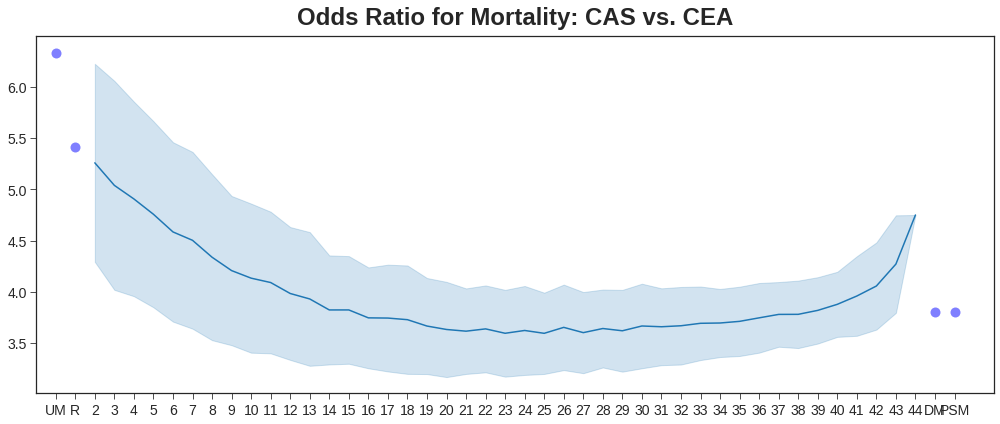

In [299]:
plot_mort(morts_cc, config_cc, mort_cc_filt, mort_cc_dm, mort_cc_rand, mort_cc_manual, 'CAS vs. CEA')

In [300]:
psm_perf_heatmap_cc = psm_perf_final_cc[:, :, :psm_perf_final_cc.shape[0] + 1]

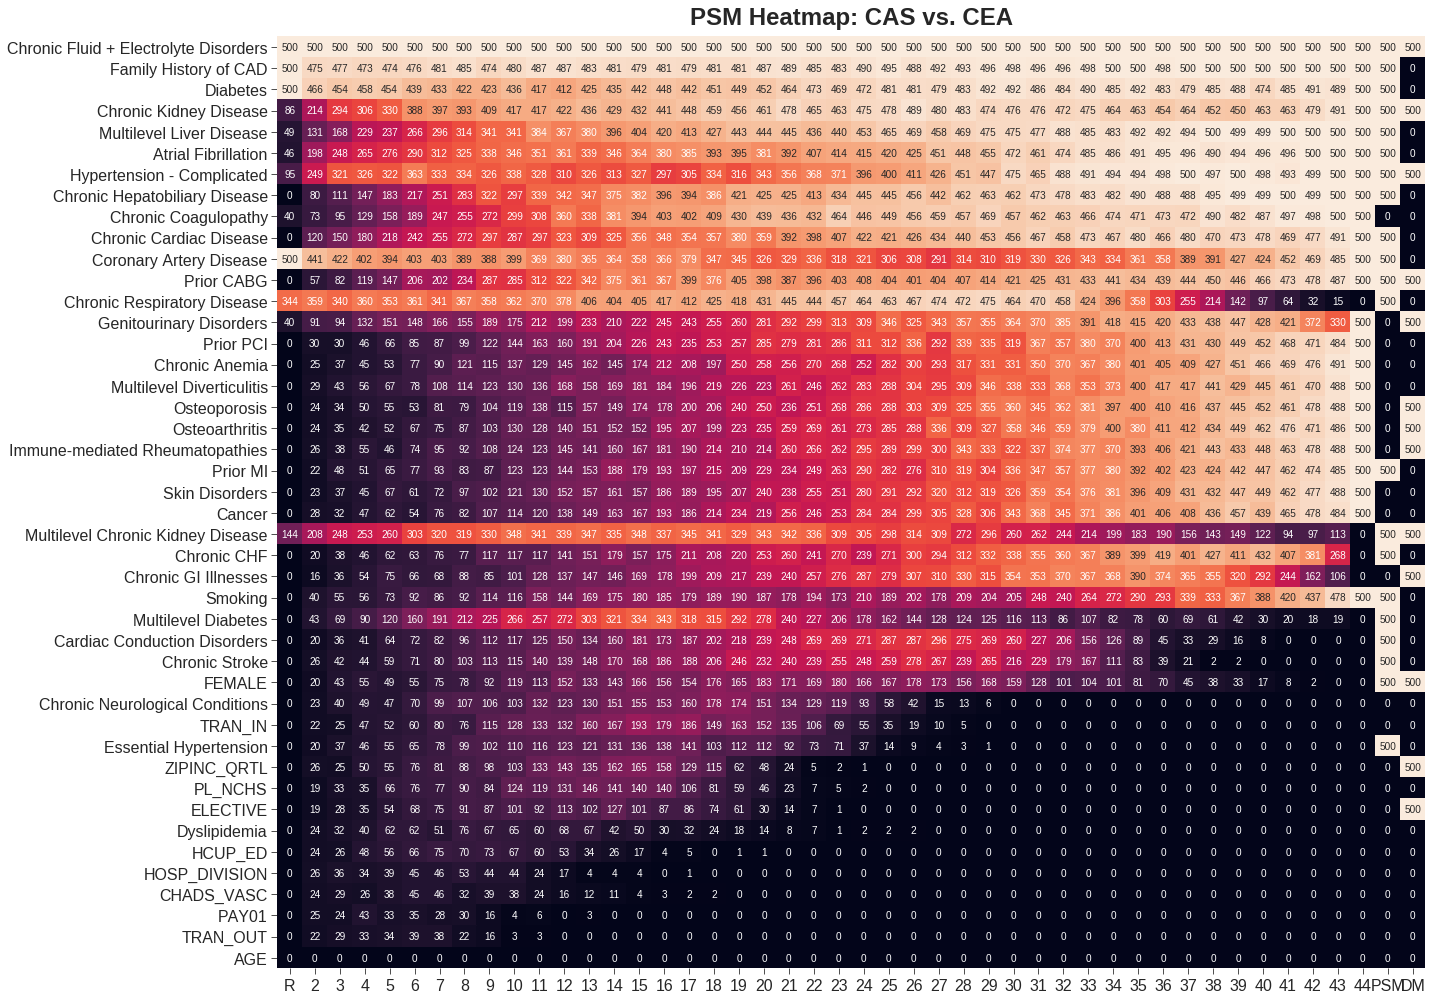

In [301]:
match_heatmap(psm_perf_heatmap_cc, tableones_cc['dm'],  random_perf_cc, manual_perf_cc, config_cc, 'CAS vs. CEA')

### Latent Space Similarity

In [315]:
for cb_i in [cb_af, cb_dvt, cb_cc]:
    cb_i.matchers['deep']['matcher']._embed_in_latent_space()

cb_af.matchers['psm'] = {}
cb_dvt.matchers['psm'] = {}
cb_cc.matchers['psm'] = {}

cb_af.matchers['psm']['matches'] = load_R_psm_results(*manual_name_af)
cb_dvt.matchers['psm']['matches'] = load_R_psm_results(*manual_name_dvt)
cb_cc.matchers['psm']['matches'] = load_R_psm_results(*manual_name_cc)

In [368]:
def plot_barcodes_in_ls(cb, matcher_name, title):
    fig, axes = plt.subplots(3, 2, figsize=(20, 6))
    
    ls_db = cb.matchers['deep']['matcher'].ls_db
    ls_db.__getitem__(0)
    
    if matcher_name == 'filtered':
        break_ind = ls_db.state_inds['control'].min()
        cases_ls = ls_db.dataset[:break_ind]
        control_ls = ls_db.dataset[break_ind:]
        
    else:
        cases_ls = ls_db.dataset[cb.matchers[matcher_name]['matches']['case'], :]
        control_ls = ls_db.dataset[np.sort(cb.matchers[matcher_name]['matches']['control'] + 
                                              ls_db.state_inds['control'].min()), :]
    
    def barcode(array, size=10):
        return np.multiply(array.reshape(-1, 1), np.ones((1, size))).T

    def barcode_std(arr, size=10):
        array = np.std(arr, axis=0)
        return np.multiply(array.reshape(-1, 1), np.ones((1, size))).T


    
    cases_ls_mean = np.mean(cases_ls, axis=0)
    control_ls_mean = np.mean(control_ls, axis=0)
    
    plt.style.use('seaborn-white')

    axes[0][0].imshow(barcode(cases_ls_mean) > 0, vmin=0, vmax=1)
    axes[0][0].set_title('Mean Cases Barcode, Binary')
    axes[1][0].imshow(barcode(control_ls_mean) > 0, vmin=0, vmax=1)
    axes[1][0].set_title('Mean Controls Barcode, Binary')
    axes[2][0].imshow(((barcode(cases_ls_mean) > 0) * ~(barcode(control_ls_mean) > 0)), vmin=0, vmax=1)
    axes[2][0].set_title('Difference of Means Barcode, Binary')
    
    im = axes[0][1].imshow(barcode(cases_ls_mean), vmin=-2, vmax=2)
    axes[0][1].set_title('Mean Cases Barcode, Continuous')
    axes[1][1].imshow(barcode(control_ls_mean), vmin=-2, vmax=2)
    axes[1][1].set_title('Mean Controls Barcode, Continuous')
    axes[2][1].imshow(np.abs(barcode(cases_ls_mean) - barcode(control_ls_mean)), vmin=-0, vmax=2)
    axes[2][1].set_title('Difference of Means Barcode, Continuous')
    
    for axis in axes.ravel():
        axis.xaxis.set_visible(False)
        axis.yaxis.set_visible(False)
    
    fig.suptitle('Matching Performance: {0}'.format(title), fontsize=16)
    

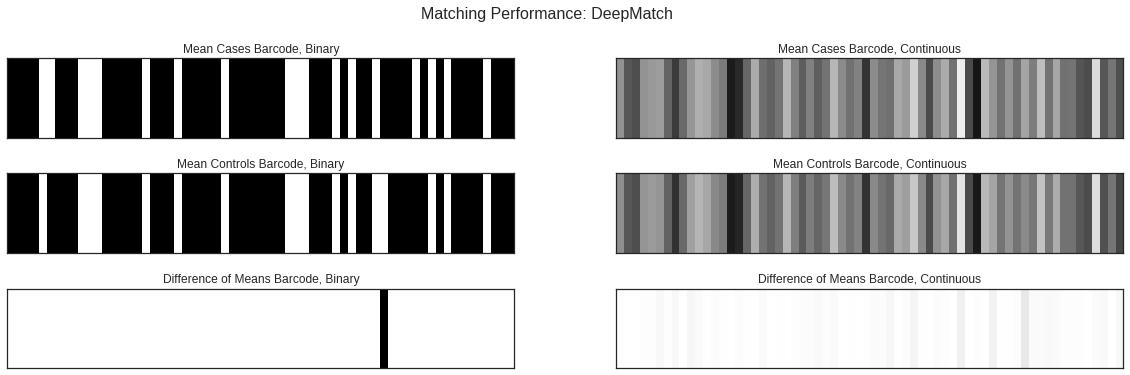

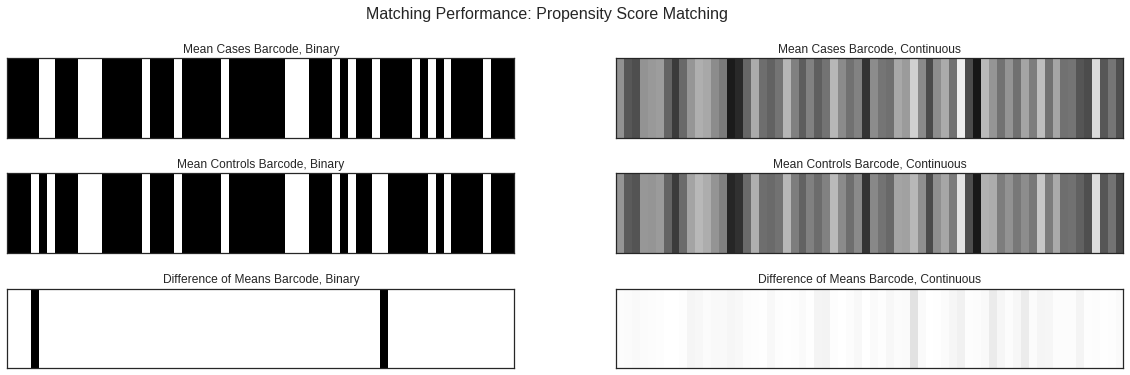

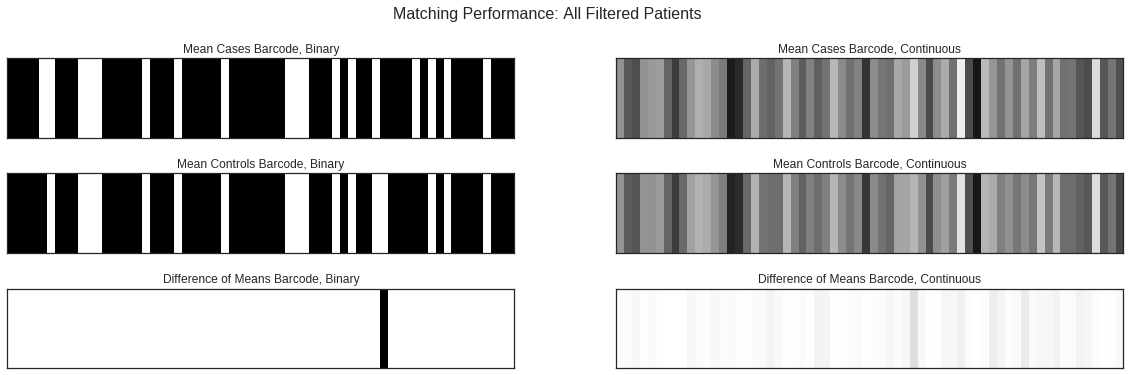

In [369]:
for thing, title in zip(['deep', 'psm', 'filtered'], ['DeepMatch', 'Propensity Score Matching', 'All Filtered Patients']):
    plot_barcodes_in_ls(cb_af, thing, title)
#     plt.savefig(FIGURE_FOLDER + f'Figure3_Barcodes_{title}.png')

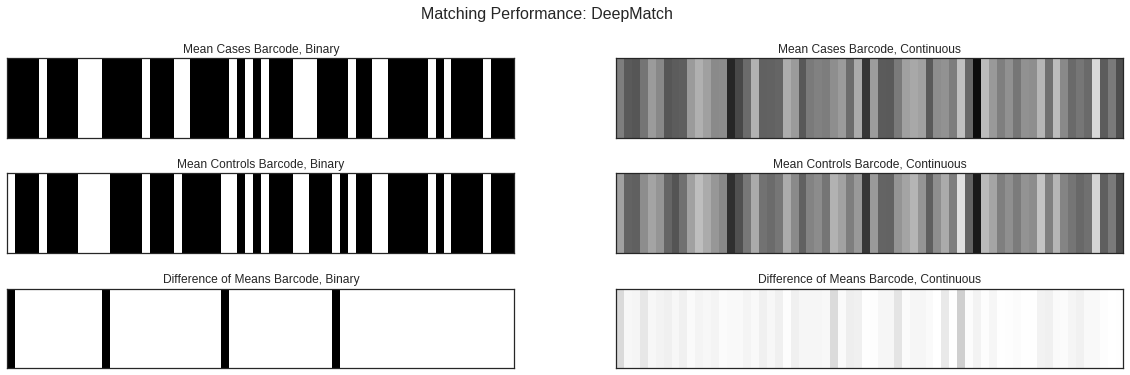

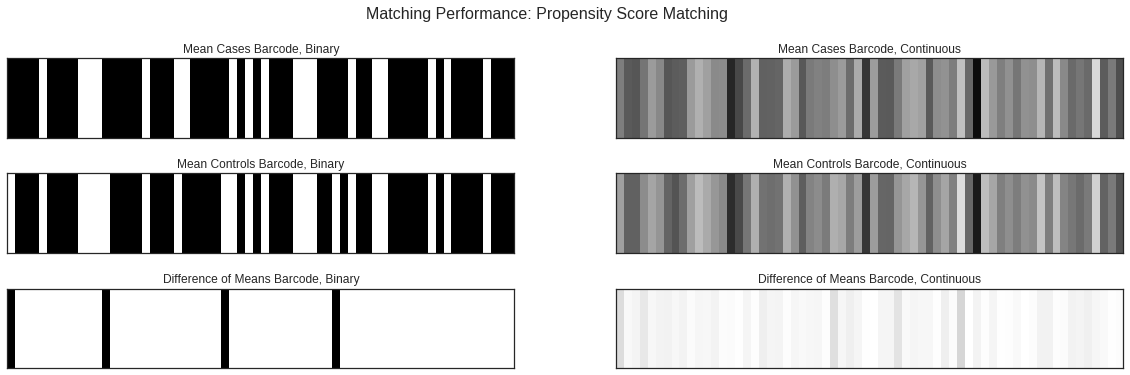

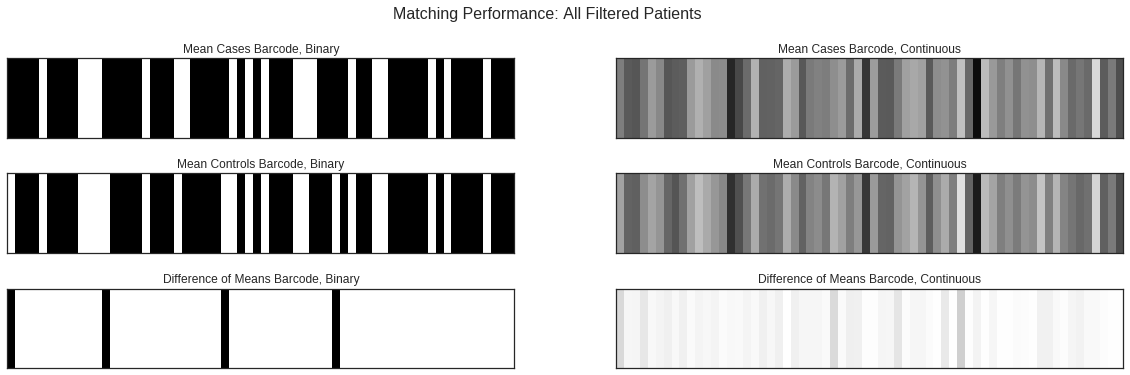

In [370]:
for thing, title in zip(['deep', 'psm', 'filtered'], ['DeepMatch', 'Propensity Score Matching', 'All Filtered Patients']):
    plot_barcodes_in_ls(cb_dvt, thing, title)
#     plt.savefig(FIGURE_FOLDER + f'Figure3_Barcodes_{title}.png')

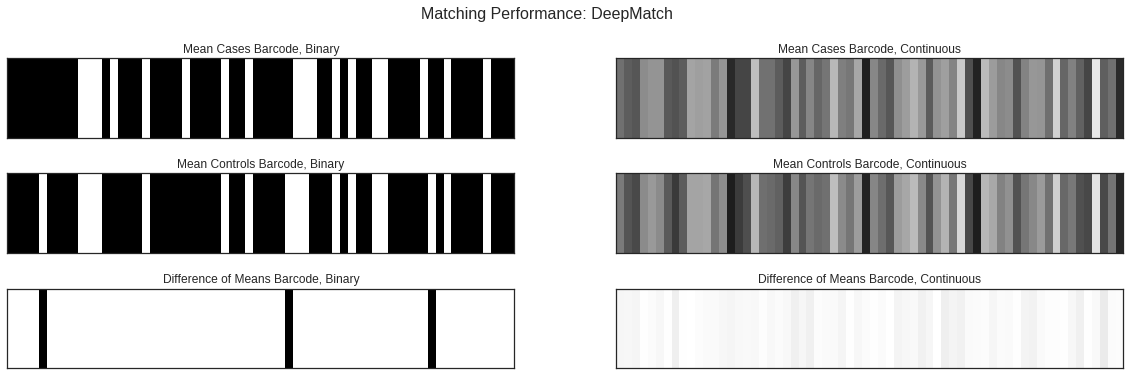

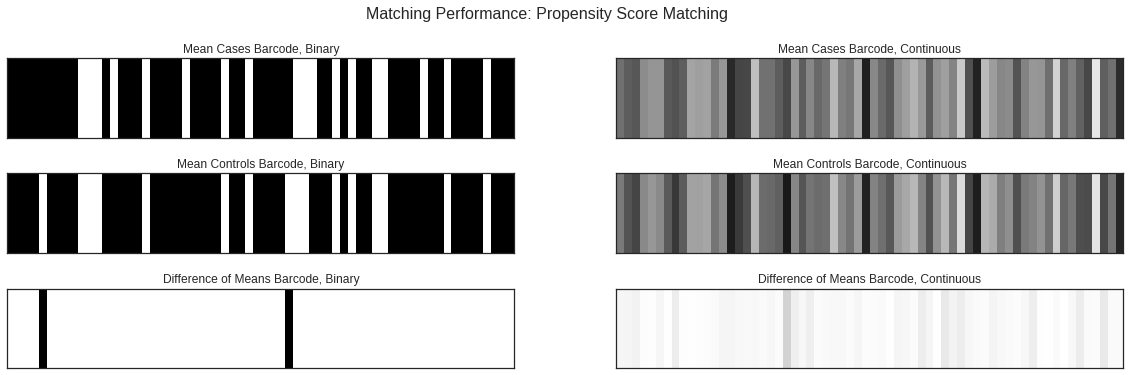

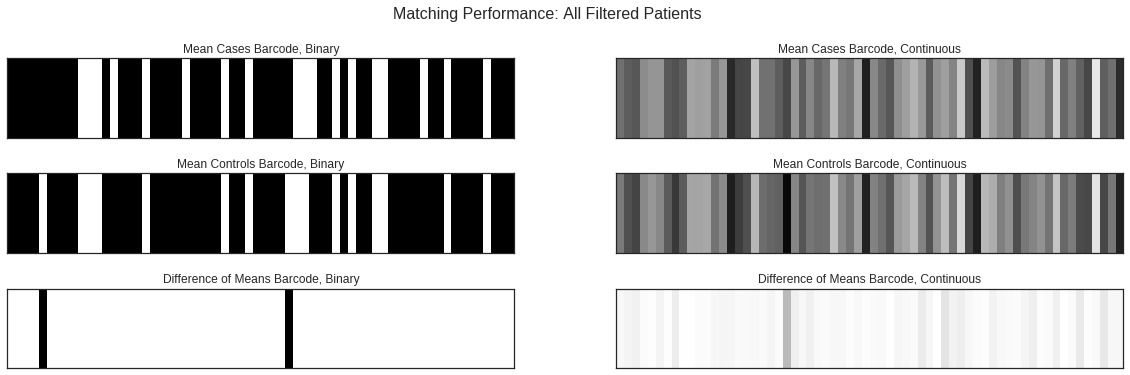

In [371]:
for thing, title in zip(['deep', 'psm', 'filtered'], ['DeepMatch', 'Propensity Score Matching', 'All Filtered Patients']):
    plot_barcodes_in_ls(cb_cc, thing, title)
#     plt.savefig(FIGURE_FOLDER + f'Figure3_Barcodes_{title}.png')